# Сборный проект - 2

## Краткое описание

Мы завершили изучение множества уроков и заданий и теперь готовы применить свои знания в этом самостоятельном проекте. Нам предстоит разработать две модели машинного обучения: первую для предсказания уровня удовлетворённости сотрудников работой, а вторую — для прогнозирования вероятности увольнения сотрудников. Оба эти аспекта крайне важны для HR-аналитиков нашей компании, так как удовлетворённость сотрудников влияет на их удержание, а непредвиденные увольнения могут нанести серьёзный финансовый урон.

## Цели и задачи проекта

**Задача 1:** Предсказать уровень удовлетворённости сотрудника на основе предоставленных данных.
- Построить и обучить модели, используя данные с характеристиками сотрудников, включая целевой признак — уровень удовлетворённости.

**Задача 2:** Предсказать вероятность увольнения сотрудника.
- Создать модели для предсказания увольнений, используя аналогичные входные признаки, но с другим целевым признаком.

### Описание данных

**1. Данные о сотрудниках:**

- **employee_id**: Уникальный идентификатор сотрудника.
- **department**: Отдел, в котором работает сотрудник (например, продажи, разработка, HR).
- **job_role**: Специфическая роль или должность сотрудника (например, аналитик данных, менеджер проекта).
- **gender**: Пол сотрудника.
- **age**: Возраст сотрудника.
- **education_level**: Уровень образования (например, бакалавр, магистр, PhD).
- **hire_date**: Дата найма сотрудника.
- **tenure**: Стаж работы в компании (в месяцах).
- **salary**: Уровень заработной платы сотрудника (например, низкий, средний, высокий).
- **performance_score**: Оценка производительности сотрудника (например, A, B, C, D).
- **work_life_balance**: Оценка баланса работы и личной жизни (например, хорошее, удовлетворительное, плохое).
- **overtime**: Выполняет ли сотрудник сверхурочную работу (да/нет).

**2. Целевые переменные:**

- **satisfaction_level**: Уровень удовлетворённости сотрудника, который нужно предсказать в задаче 1. Представляет собой числовое значение от 0 (неудовлетворён) до 1 (полностью удовлетворён).

- **attrition**: Целевая переменная для задачи 2, обозначающая факт увольнения сотрудника (1 - уволился, 0 - остался).

## План работы

### Задача 1: Предсказание уровня удовлетворённости сотрудника

1. **Загрузка данных**
   - Загрузить и изучить тренировочную выборку и тестовые данные.

2. **Предобработка данных**
   - Изучить данные, заполнить пропуски, провести первичную обработку.

3. **Исследовательский анализ данных**
   - Проанализировать признаки для подготовки и их возможного перераспределения.

4. **Подготовка данных**
   - Подготовить данные, используя пайплайн для предобработки и кодирования признаков.

5. **Обучение моделей**
   - Обучить линейную модель и модель дерева решений, настроить гиперпараметры и выбрать лучшую модель по метрике SMAPE.

6. **Оформление выводов**
   - Сделать выводы о лучших моделях и их результатах.

### Задача 2: Предсказание увольнения сотрудника

1. **Загрузка данных**
   - Загрузить данные о сотрудниках, аналогично прошлой задаче.

2. **Предобработка данных**
   - Провести предобработку данных, аналогичную первой задаче.

3. **Исследовательский анализ данных**
   - Провести исследовательский анализ данных, включая создание портрета "уволившегося сотрудника" и проверку влияния удовлетворённости на увольнение.

4. **Добавление нового входного признака**
   - Включить предсказанный уровень удовлетворённости в набор данных.

5. **Подготовка данных**
   - Выполнить подготовку данных с использованием пайплайна и кодировок.

6. **Обучение моделей**
   - Обучить минимум три модели, подобрать гиперпараметры и оценить качество по метрике ROC-AUC.

7. **Выводы**
   - Сделать промежуточные выводы о модельных результатах.

### Импорт библиотек

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import phik
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, make_scorer

sns.set(rc={'figure.figsize': (20, 10)})

RANDOM_STATE = 42
TEST_SIZE = 0.25

### Функции для проекта

In [2]:
#Нарисовать горизонтальные барплоты для тренировочной и тестовой выборок
def plot_train_test(
        train,
        test,
        variable,
        title,
        ylabel,
        norm=False,
        left_title='Train',
        right_title='Test',
        xlabel='Количество пользователей',
):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    f.suptitle(title, fontsize=20)

    f.text(0.5, 0.04, xlabel, ha='center')

    (
        train[variable]
        .value_counts(normalize=norm)
        .sort_values()
        .plot.barh(figsize=(20, 5), color='green', label='test', ax=ax1)
    )
    ax1.set_title(left_title)
    ax1.set_ylabel(ylabel)

    (
        test[variable]
        .value_counts(normalize=norm)
        .sort_values()
        .plot.barh(figsize=(20, 5), color='blue', label='train', ax=ax2)
    )
    ax2.set_title(right_title)

    plt.show()

In [3]:
#Приведение колонок и значений к единому формату, заменяет пробелы на нижнее подчеркивание (_), приводит к нижнему регистру
def transform_columns_values(df):
    df.columns = df.columns.str.replace(' ', '_', regex=True).str.lower()
    object_columns = df.select_dtypes('object').columns
    df[object_columns] = df.select_dtypes('object').apply(
        lambda x: x.str.replace(' ', '_', regex=True).str.lower()
    )
    display(df.info())
    print('\n')
    display(df.describe())
    display(df.head())
    print(f'''Явных дублей: {df.duplicated().sum()}\n\n''')
    print('Пропущенных значений:\n')
    display(
        (
            pd.DataFrame(
                round(df.isna().mean() * 100, 1).sort_values(ascending=False)
            ).style.background_gradient('coolwarm')
        )
    )
    return df

## Загрузка данных:

In [4]:
train_path = '/datasets/train_job_satisfaction_rate.csv'
X_test_path = '/datasets/test_features.csv'
y_test_path = '/datasets/test_target_job_satisfaction_rate.csv'

train_url = 'https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv'
X_test_url = 'https://code.s3.yandex.net/datasets/test_features.csv'
y_test_url = 'https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv'

def load_data(file_path, file_url, sep=","):
    if os.path.exists(file_path):
        data = pd.read_csv(file_path, sep=sep)
    else:
        data = pd.read_csv(file_url, sep=sep)
    return data

train = load_data(train_path, train_url)
X_test = load_data(X_test_path, X_test_url)
y_test = load_data(y_test_path, y_test_url)


### Исследовательский анализ данных

#### Общий обзор

In [5]:
for df in [train, X_test, y_test]:
    df = transform_columns_values(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


Явных дублей: 0


Пропущенных значений:



,0
dept,0.200000
level,0.100000
id,0.000000
workload,0.000000
employment_years,0.000000
last_year_promo,0.000000
last_year_violations,0.000000
supervisor_evaluation,0.000000
salary,0.000000
job_satisfaction_rate,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Явных дублей: 0


Пропущенных значений:



,0
dept,0.100000
id,0.000000
level,0.000000
workload,0.000000
employment_years,0.000000
last_year_promo,0.000000
last_year_violations,0.000000
supervisor_evaluation,0.000000
salary,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Явных дублей: 0


Пропущенных значений:



,0
id,0.000000
job_satisfaction_rate,0.000000


In [6]:
### Проверим на аномальные зарплаты в тренировочной выборке:
anomal_salary = train[np.abs(stats.zscore(train['salary'])) >= 3]
print(f"Аномальных зарплат: {len(anomal_salary)}")
anomal_salary.head(len(anomal_salary))

Аномальных зарплат: 40


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
45,538347,technology,sinior,high,3,no,no,1,84000,0.21
141,128304,marketing,sinior,high,7,no,no,3,80400,0.48
360,405345,marketing,sinior,high,7,no,no,2,81600,0.58
1203,493024,technology,sinior,high,10,no,no,4,79200,0.64
1241,148024,technology,sinior,high,4,no,no,4,94800,0.67
1491,796799,marketing,sinior,high,4,no,no,3,79200,0.25
1718,712878,purchasing,sinior,high,9,no,yes,4,80400,0.66
1799,494125,marketing,sinior,high,10,no,no,4,84000,0.81
1855,355174,technology,sinior,high,6,no,yes,4,88800,0.74
1899,642094,technology,sinior,high,6,no,no,5,88800,0.83


In [7]:
anomal_salary[['level',  'dept']].value_counts()

level   dept      
sinior  technology    17
        marketing      8
        purchasing     7
        hr             5
        sales          3
Name: count, dtype: int64

In [8]:
### Проверим на аномальные зарплаты в тестовой выборке:
anomal_salary = X_test[np.abs(stats.zscore(X_test['salary'])) >= 3]
print(f"Аномальных зарплат: {len(anomal_salary)}")
anomal_salary.head(len(anomal_salary))

Аномальных зарплат: 23


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
178,540148,hr,sinior,high,4,no,no,5,81600
438,270400,technology,sinior,high,2,no,no,4,94800
459,719982,marketing,sinior,high,9,no,no,5,82800
594,950627,technology,sinior,high,6,no,no,5,80400
698,145965,technology,sinior,high,1,no,no,4,87600
706,198703,technology,sinior,high,8,no,no,4,87600
711,346022,technology,sinior,high,3,no,no,4,86400
725,946374,technology,sinior,high,7,no,no,4,80400
765,205752,technology,sinior,high,9,no,no,5,94800
793,510806,technology,sinior,high,5,no,no,4,96000


In [9]:
anomal_salary[['level', 'dept']].value_counts()

level   dept      
sinior  technology    16
        hr             3
        marketing      2
        purchasing     1
        sales          1
Name: count, dtype: int64

В выбросах - записи по специалистам с уровнем сеньор, при высокой нагрузке - нормальное явление. В тестовой выборке также они присутствуют

### Неявные дубли

Наличие одинаковых строк в таблице может затруднить обучение одели. Внесем `id` в индекс и проверим их наличие.

In [10]:
train = train.set_index('id')
X_test = X_test.set_index('id')
y_test = y_test.set_index('id')
train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


In [11]:
train[train.duplicated(keep=False)].sort_values(
    ['dept', 'level', 'employment_years']
).tail(4)


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
850573,technology,middle,medium,5,no,no,4,40800,0.65
717020,technology,middle,medium,5,no,no,4,40800,0.65
928326,technology,middle,medium,7,no,no,3,38400,0.40
516194,technology,middle,medium,7,no,no,3,38400,0.40


#### После выноса `id` в индекс мы обнаружили дубликаты, которые могут затруднять обучение модели. Нужно от них избавиться.

In [12]:
train = train.drop_duplicates()

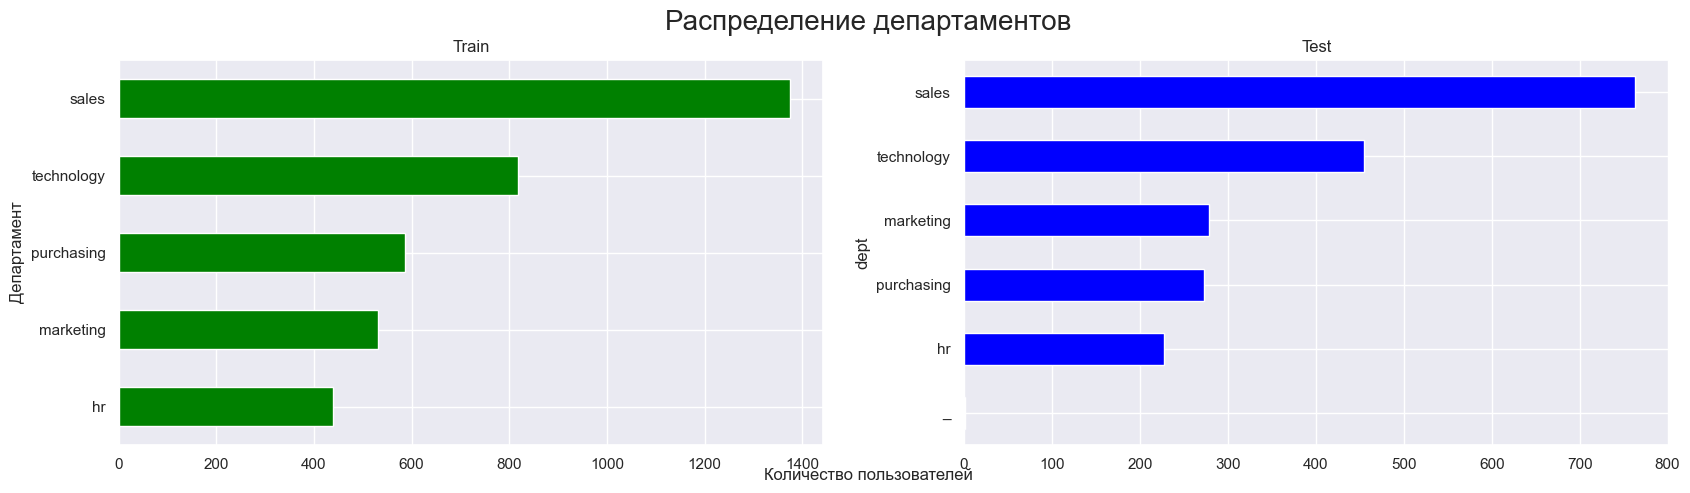

In [13]:
plot_train_test(
    train, X_test, 'dept', 'Распределение департаментов', 'Департамент'
)

#### В тестовом датасете есть отдел, который указан как `_`, заполним их пустыми значениями `NaN`

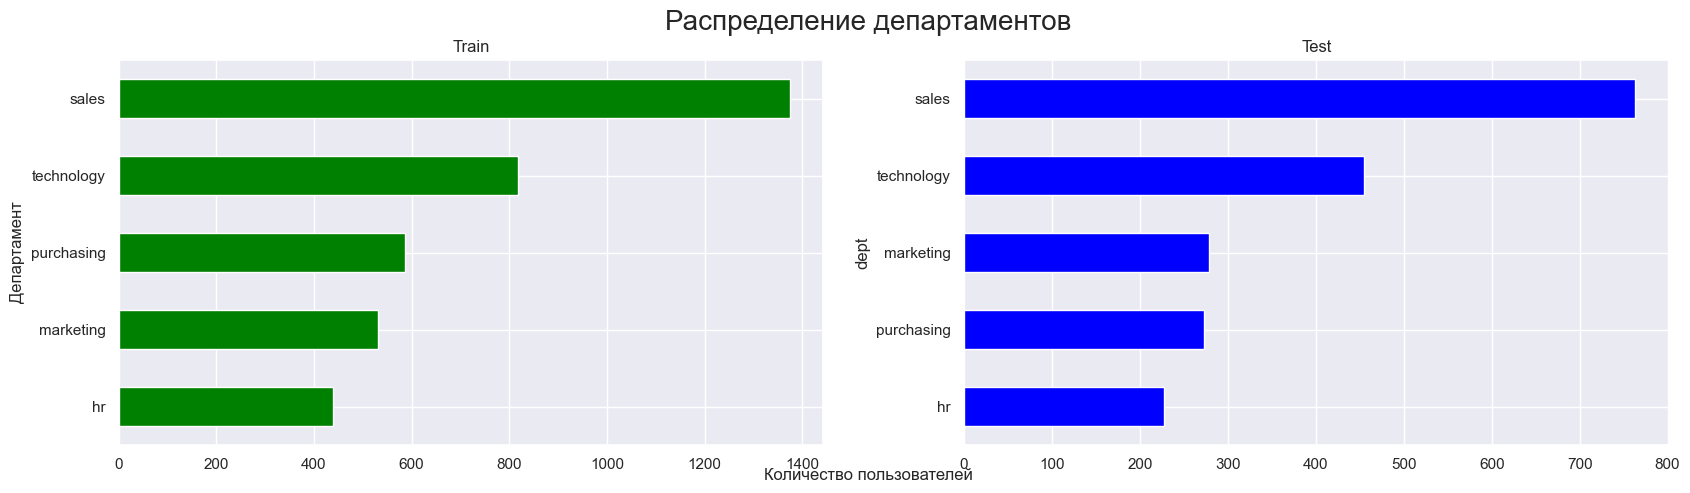

In [14]:
X_test['dept'] = X_test['dept'].replace('_', np.nan)
plot_train_test(
    train, X_test, 'dept', 'Распределение департаментов', 'Департамент'
)

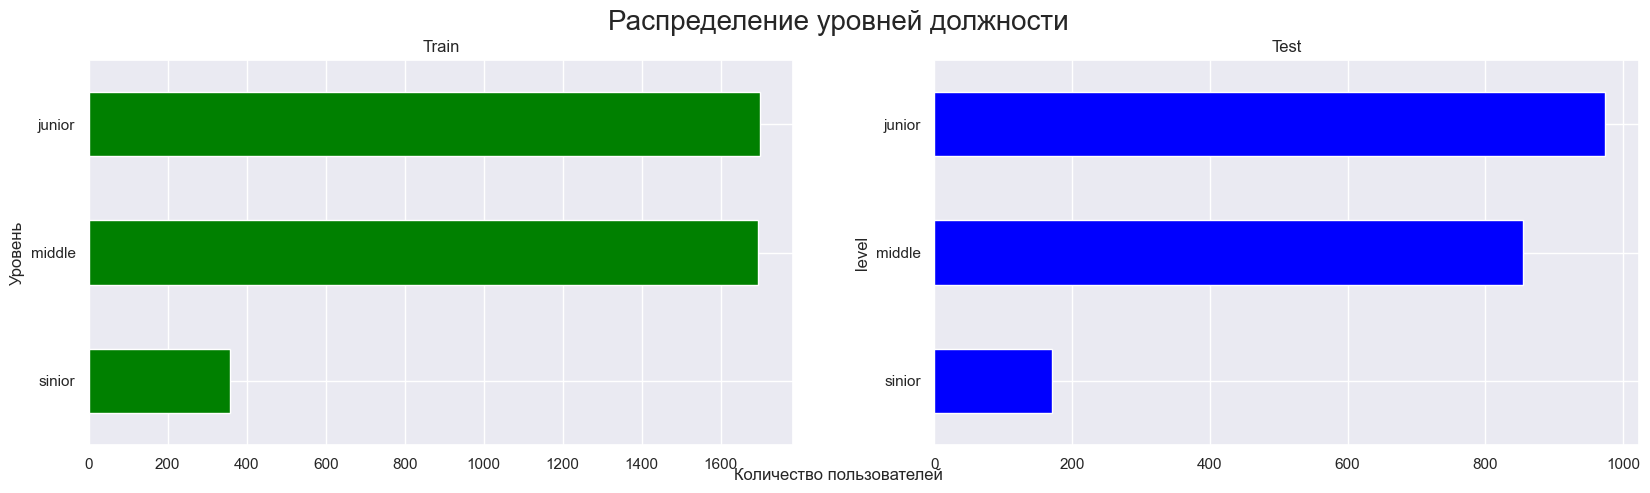

In [15]:
plot_train_test(
    train, X_test, 'level', 'Распределение уровней должности', 'Уровень'
)

#### Старших специалистов меньше, чем остальных, это нормально. Структуры данных похожи

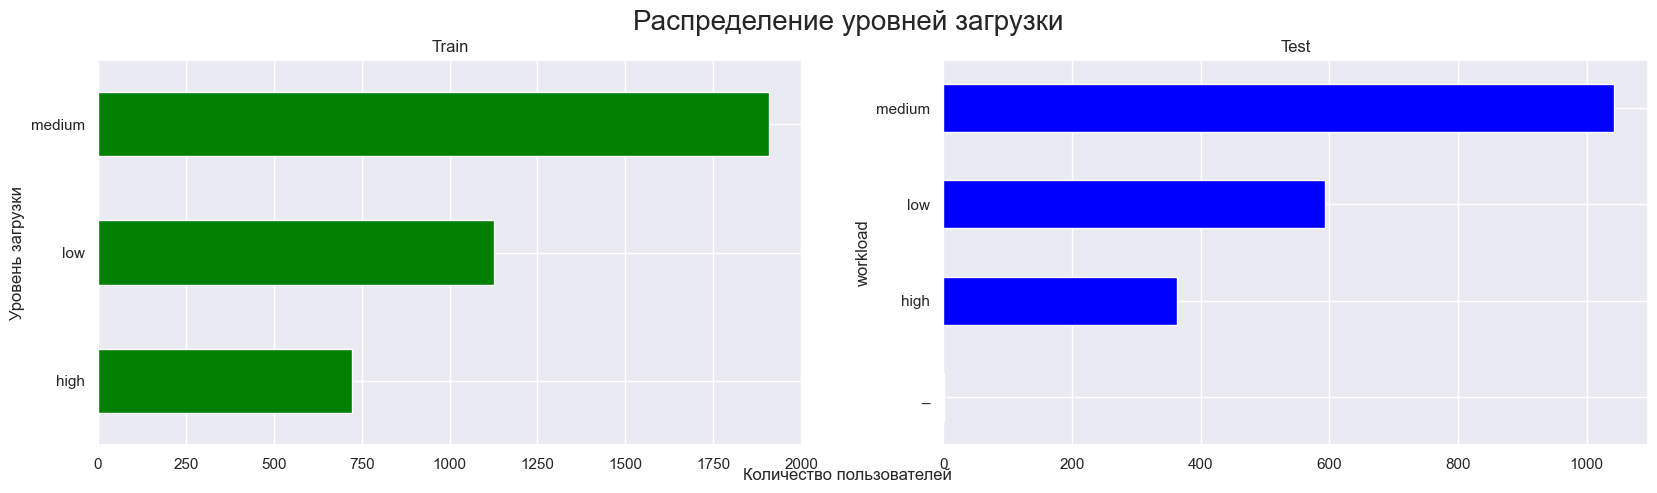

In [16]:
plot_train_test(
    train,
    X_test,
    'workload',
    'Распределение уровней загрузки',
    'Уровень загрузки',
)

#### Также есть записи с ошибкой в тестовой выборке. Заполним пустыми значениями `Nan`

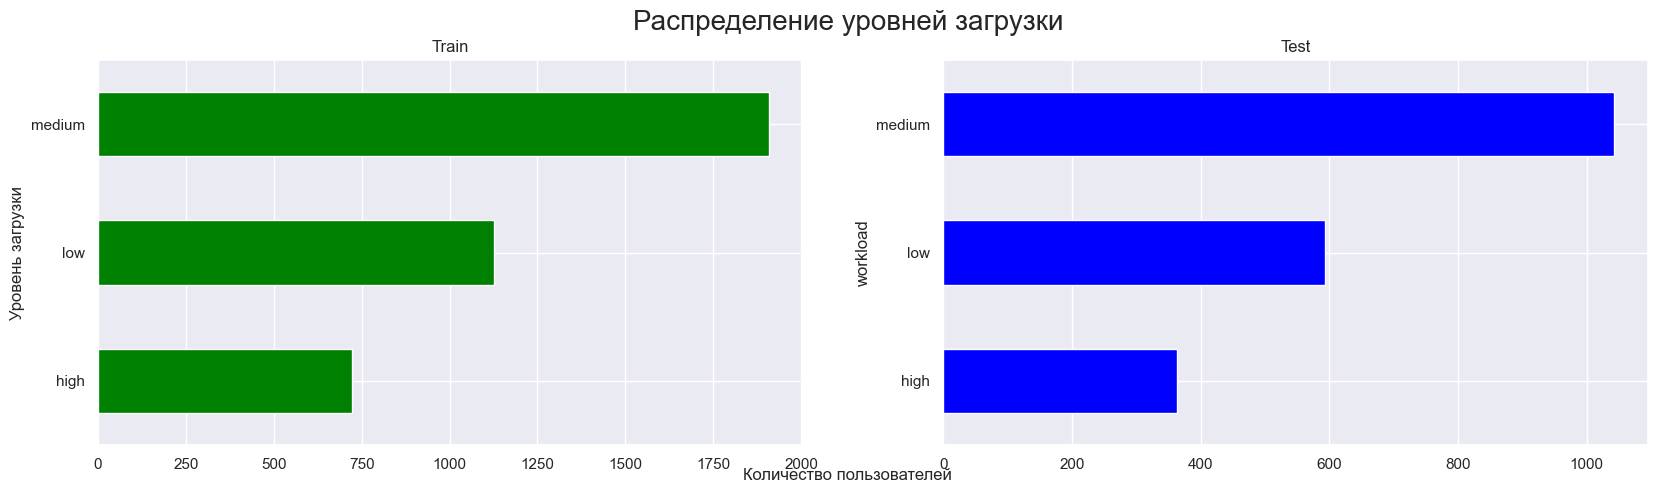

In [17]:
X_test['workload'] = X_test['workload'].replace('_', np.nan)
plot_train_test(
    train,
    X_test,
    'workload',
    'Распределение уровней загрузки',
    'Уровень загрузки',
)

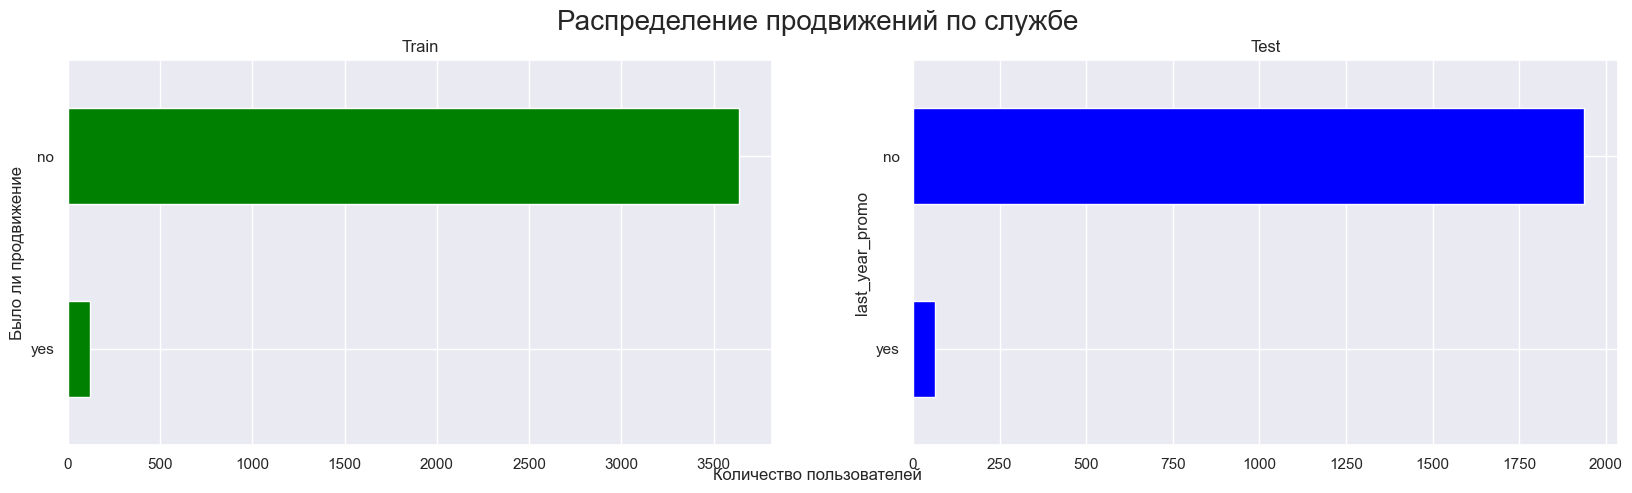

In [18]:
plot_train_test(
    train,
    X_test,
    'last_year_promo',
    'Распределение продвижений по службе',
    'Было ли продвижение',
)

#### Сильный дисбаланс в продвижении и непродвижении сотрудников по службе. Нужно будет его устранить

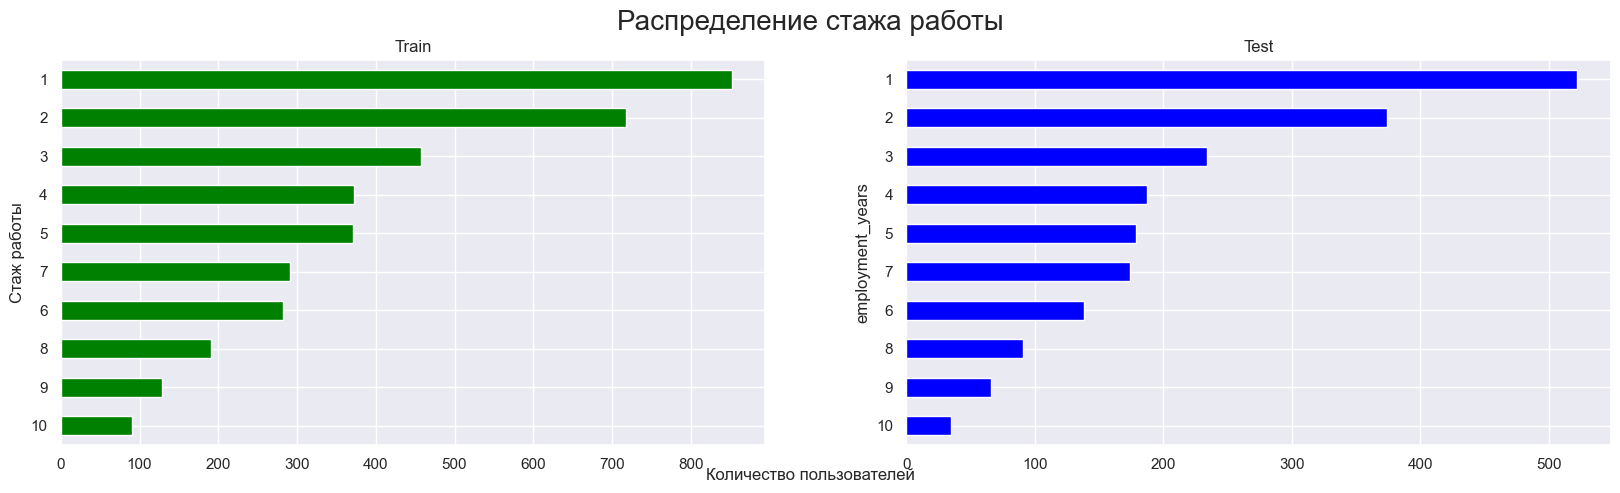

In [19]:
plot_train_test(
    train,
    X_test,
    'employment_years',
    'Распределение стажа работы',
    'Стаж работы',
)

#### В компании много новичкой, меньше сотрудников с большими стажами.

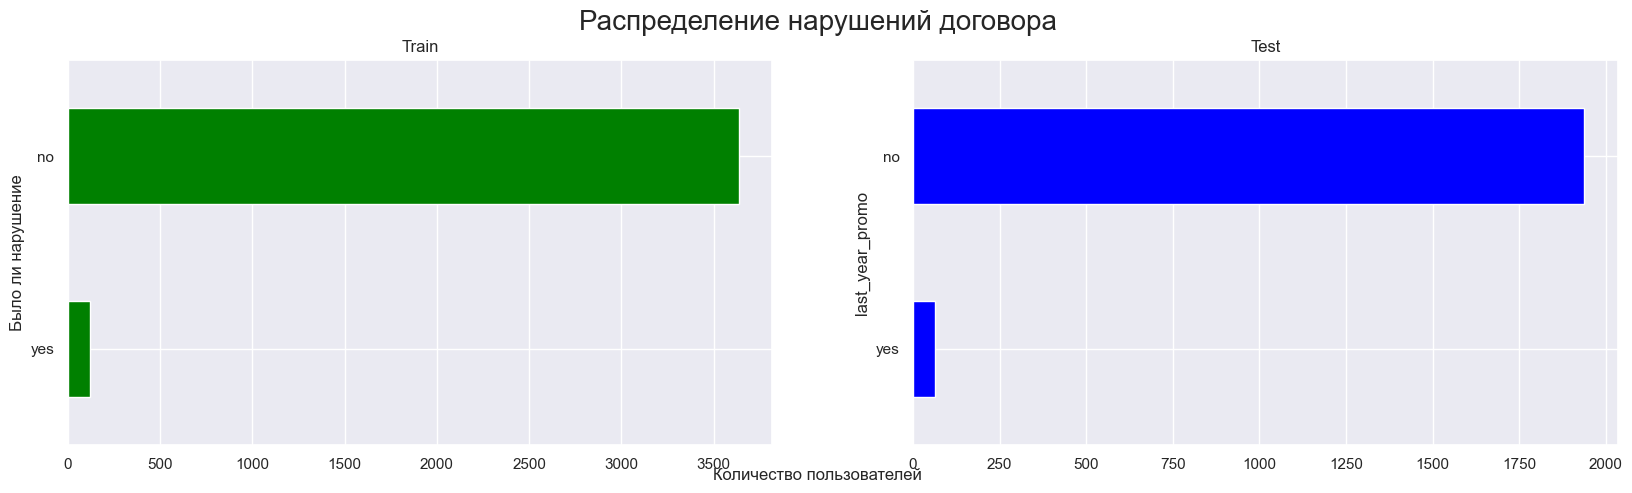

In [20]:
plot_train_test(
    train,
    X_test,
    'last_year_promo',
    'Распределение нарушений договора',
    'Было ли нарушение',
)

#### Сотрудники особо не нарушают трудовой договор. Это хорошо :)

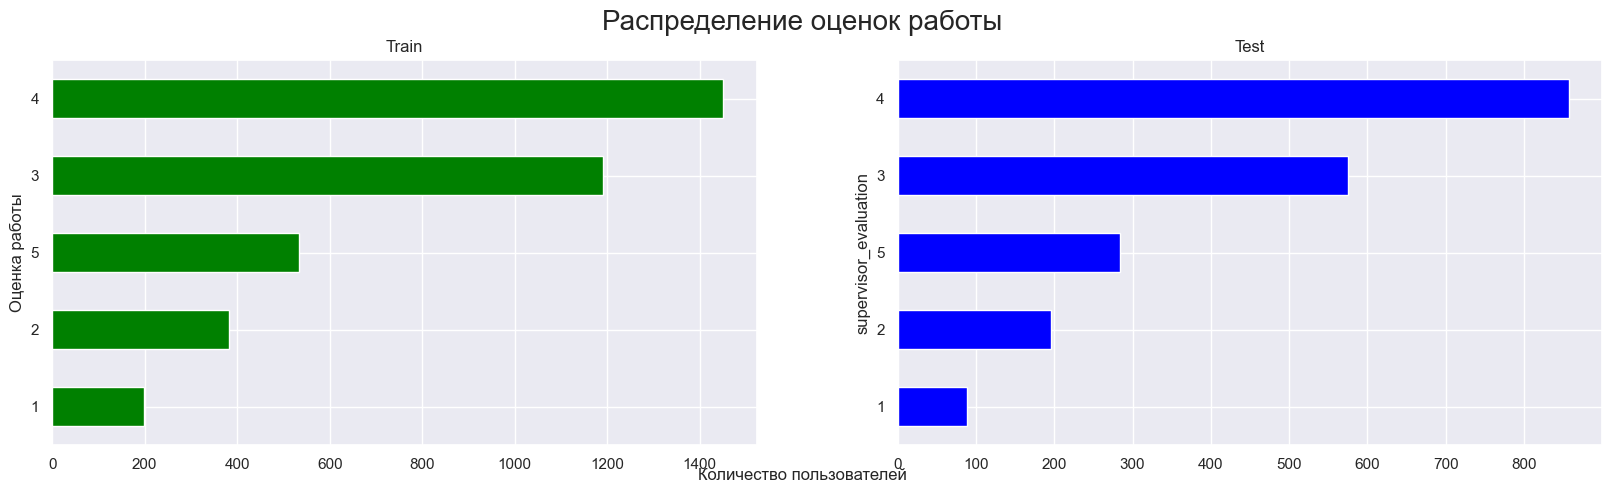

In [21]:
plot_train_test(
    train,
    X_test,
    'supervisor_evaluation',
    'Распределение оценок работы',
    'Оценка работы',
)

#### Преобладают средние оценки (4-3), в середине оценка `5`. Это хорошо, что преобладают средние или высокие оценки.

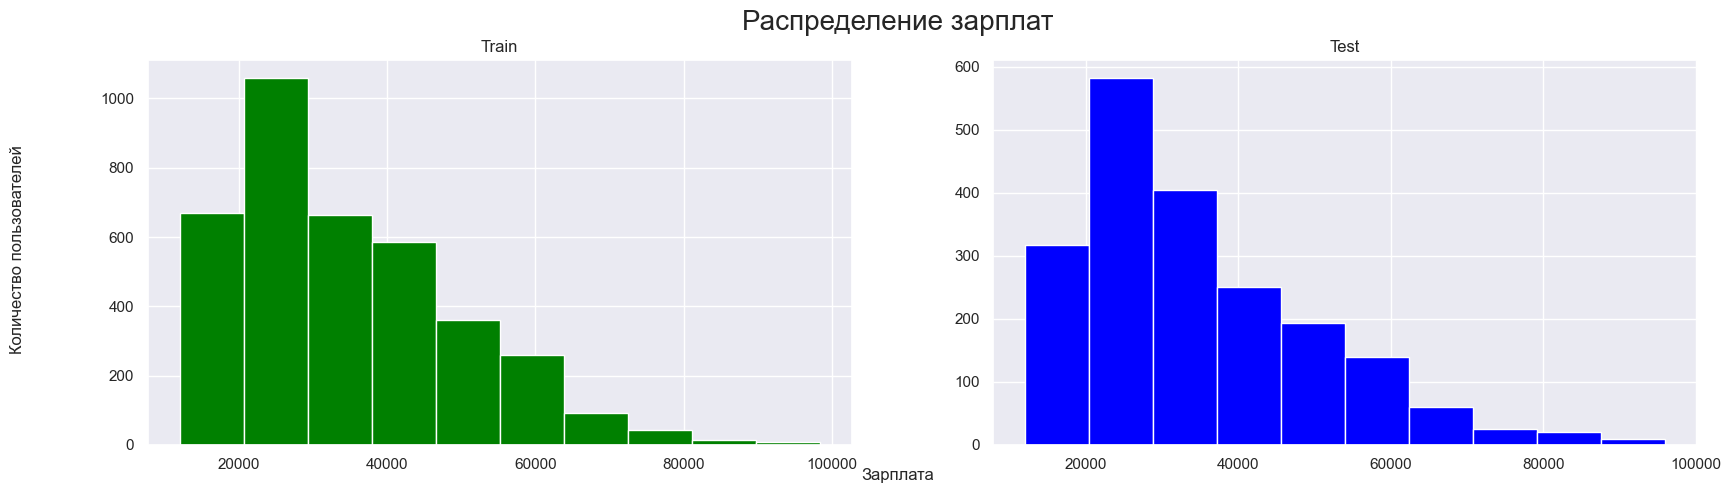

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
f.suptitle('Распределение зарплат', fontsize=20)

f.text(0.5, 0.04, 'Зарплата', ha='center')
f.text(
    0.06,
    0.5,
    'Количество пользователей',
    ha='center',
    va='center',
    rotation='vertical',
)

train['salary'].hist(figsize=(20, 5), color='green', ax=ax1)
ax1.set_title('Train')

X_test['salary'].hist(figsize=(20, 5), color='blue', ax=ax2)
ax2.set_title('Test')

plt.show()

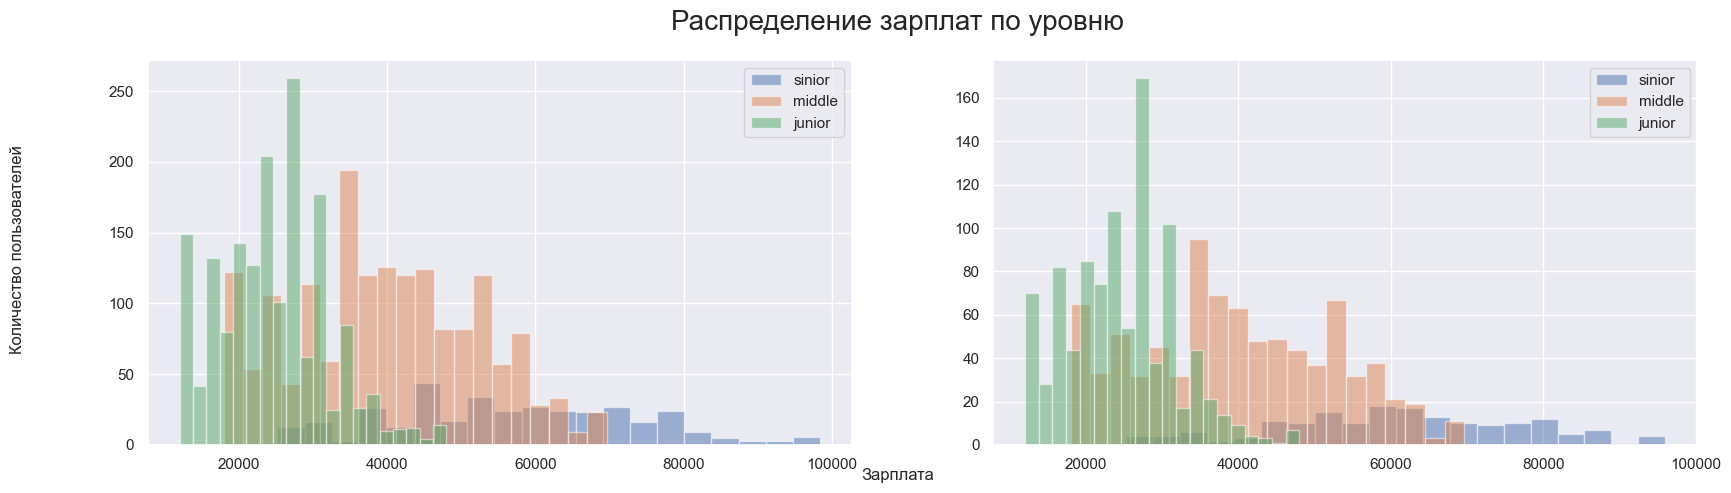

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
f.suptitle('Распределение зарплат по уровню', fontsize=20)

f.text(0.5, 0.04, 'Зарплата', ha='center')
f.text(
    0.06,
    0.5,
    'Количество пользователей',
    ha='center',
    va='center',
    rotation='vertical',
)

ax1.hist(
    train.query('level == "sinior"')['salary'],
    bins=20,
    alpha=0.5,
    label='sinior',
)
ax1.hist(
    train.query('level == "middle"')['salary'],
    bins=20,
    alpha=0.5,
    label='middle',
)
ax1.hist(
    train.query('level == "junior"')['salary'],
    bins=20,
    alpha=0.5,
    label='junior',
)
ax1.legend()

ax2.hist(
    X_test.query('level == "sinior"')['salary'],
    bins=20,
    alpha=0.5,
    label='sinior',
)
ax2.hist(
    X_test.query('level == "middle"')['salary'],
    bins=20,
    alpha=0.5,
    label='middle',
)
ax2.hist(
    X_test.query('level == "junior"')['salary'],
    bins=20,
    alpha=0.5,
    label='junior',
)
ax2.legend()

plt.show()

#### Зарплата зависит также от отдела, видимо часть старших специалистов одного отдела получают зарплату младших специалистов другого отдела.

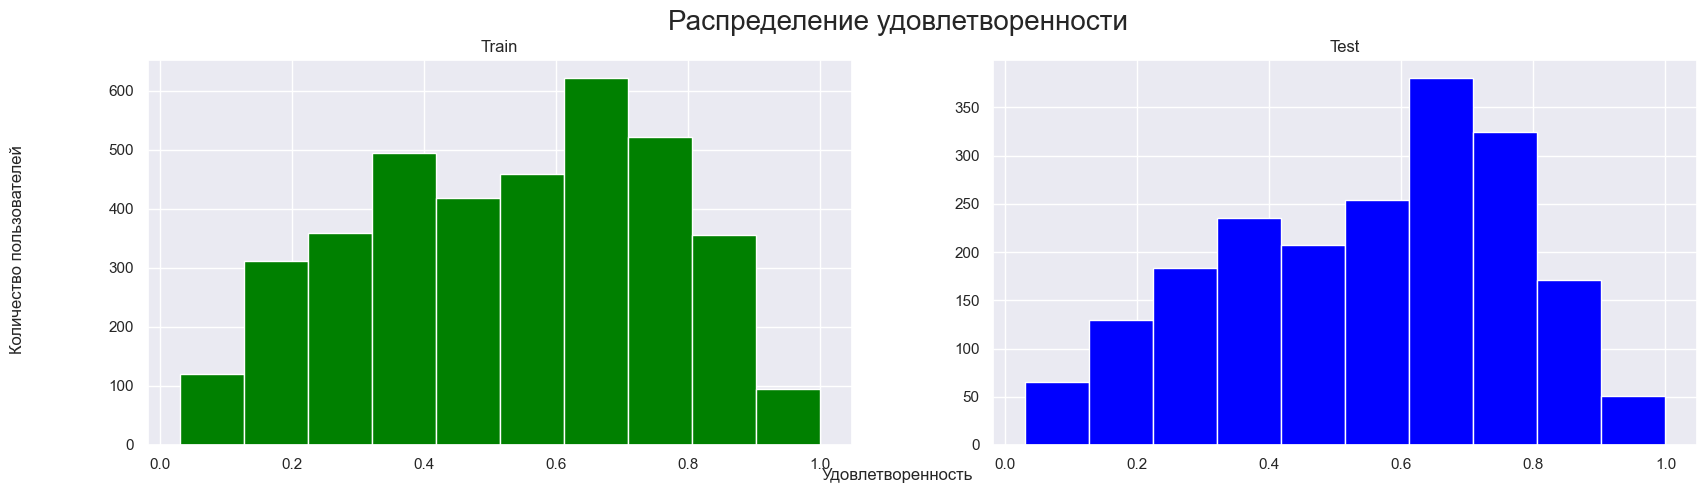

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
f.suptitle('Распределение удовлетворенности', fontsize=20)

f.text(0.5, 0.04, 'Удовлетворенность', ha='center')
f.text(
    0.06,
    0.5,
    'Количество пользователей',
    ha='center',
    va='center',
    rotation='vertical',
)

train['job_satisfaction_rate'].hist(figsize=(20, 5), color='green', ax=ax1)
ax1.set_title('Train')

y_test['job_satisfaction_rate'].hist(figsize=(20, 5), color='blue', ax=ax2)
ax2.set_title('Test')

plt.show()

#### В целом - сотрудники скорей удовлетворены своей работой, нежели нет.

### Корреляционный анализ
Мультиколинеарность может затруднить работу регрессионных моделей. Проверим, нет ли её.

In [25]:
train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


<Axes: >

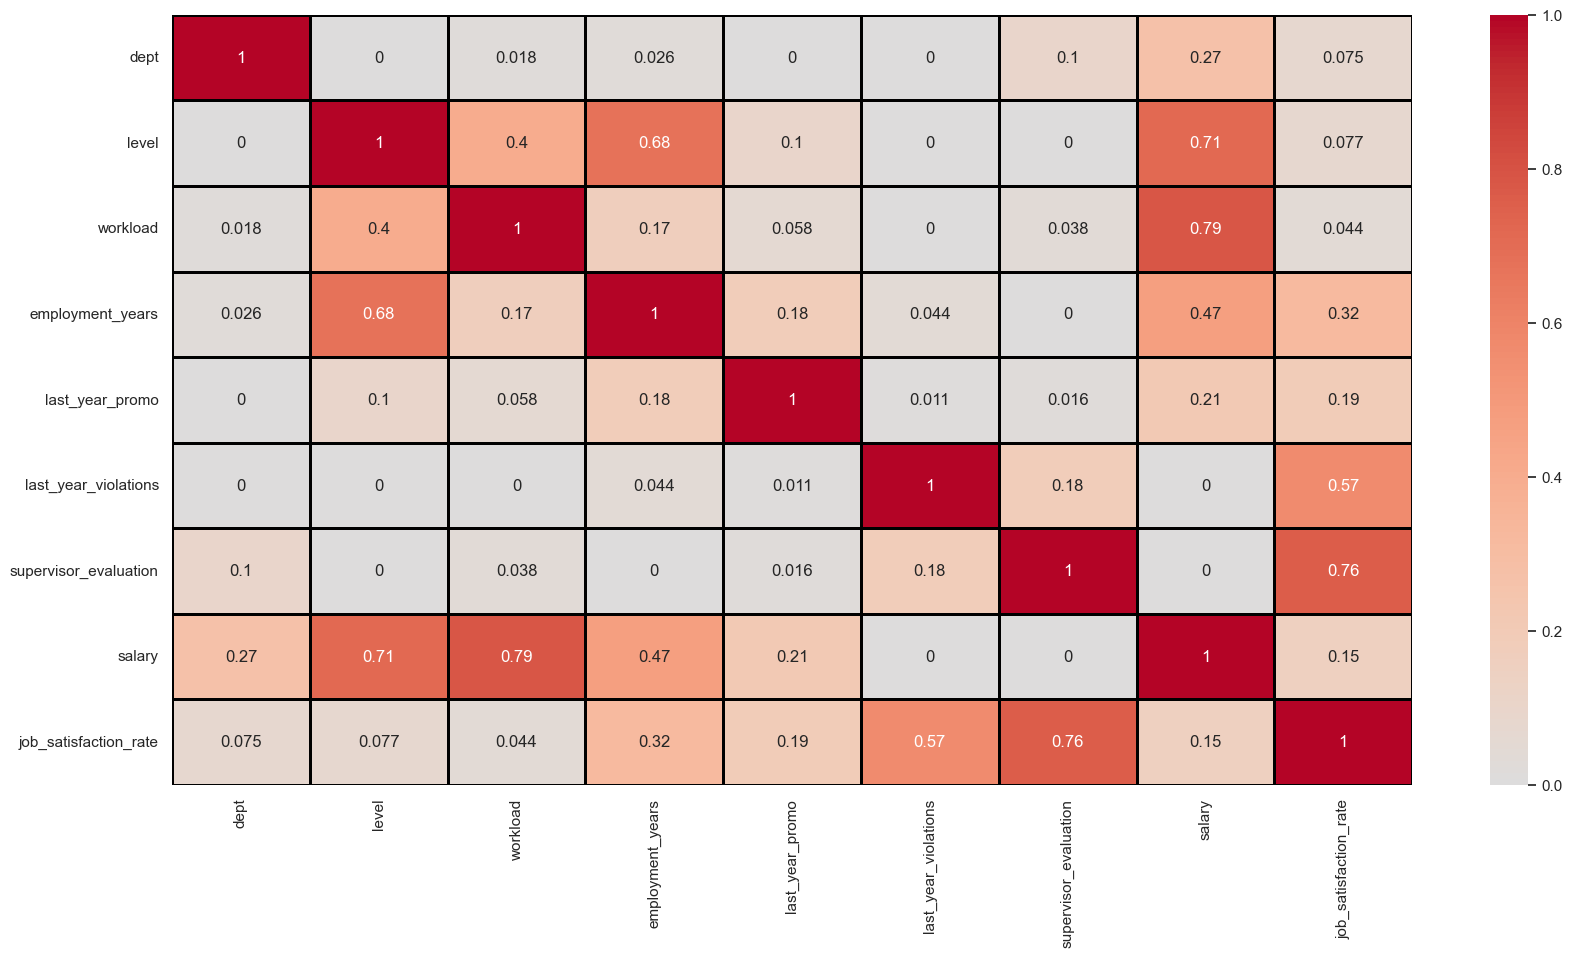

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    train.phik_matrix(interval_cols=['salary', 'job_satisfaction_rate']),
    cmap='coolwarm',
    center=0,
    annot=True,
    linewidths=2,
    linecolor='black',
)

#### Коэффииент корреляции не превышает 0.8, поэтому оставим все переменные

### Моделирование
Сначала создадим стандартный pipeline с обработкой признаков, протестируем на нем одну модель без гиперпараметров, затем протестируем разные методы обработки и предсказаний с помощью Grid Search и выберем лучшую.

#### Подготовка данных:

In [27]:
X_train = train.drop(['job_satisfaction_rate'], axis=1)
X_train = X_train.sort_index()
y_train = train['job_satisfaction_rate']
y_train = y_train.sort_index()

X_test = X_test.sort_index()
y_test = y_test.sort_index()

In [28]:
#Удостоверимся, что X_test и y_test соответствуют друг другу, соединим их
test_df = X_test.merge(y_test, left_index=True, right_index=True)

X_test = test_df.drop(['job_satisfaction_rate'], axis=1)
y_test = test_df['job_satisfaction_rate']

#### Часть колонок стоит обработать one_hot энкодером, для некоторых подойдет ordinal_encoder

In [29]:
ohe_cols = ['dept', 'last_year_promo', 'last_year_violations']
ord_cols = ['level', 'workload']
num_cols = ['salary', 'supervisor_evaluation', 'employment_years']

In [30]:
ord_processor = Pipeline(
    # Обработка признаков с иерархией
    [
        (
            'simpleImputer_before_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high'],
                ],
                handle_unknown='use_encoded_value',
                unknown_value=np.nan,
            ),
        ),
        (
            'simpleImputer_after_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
        ),
    ]
)

In [31]:
ohe_processor = Pipeline(
    # Обработка признаков, где иерархия не важна
    [
        (
            'simpleImputer_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
        ),
        (
            'ohe',
            OneHotEncoder(
                drop='first', handle_unknown='ignore', sparse_output=False
            ),
        ),
    ]
)

In [32]:
data_preprocessor = ColumnTransformer(
    # Пайплайн обработки
    [
        ('ohe', ohe_processor, ohe_cols),
        ('ord', ord_processor, ord_cols),
        ('num', StandardScaler(), num_cols),
    ],
    remainder='passthrough',
)

In [33]:
pipe_final = Pipeline(
    # Финальный пайплайн
    [
        ('preprocessor', data_preprocessor),
        ('model', DecisionTreeRegressor(random_state=RANDOM_STATE)),
    ]
)

### Поиск модели и обработки
#### Проверим разные модели с разными гиперпараметрами а также попробуем разные обработчики числовых переменных

In [34]:
# Параметры логистической регрессии
lin_params = {}

lin_params['preprocessor__num'] = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
]

lin_params['model'] = [LinearRegression()]

In [35]:
# Параметры для KNeighborsClassifier
knn_params = {}

knn_params['preprocessor__num'] = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
]

knn_params['model__n_neighbors'] = [2, 5, 10, 25, 50]
knn_params['model'] = [KNeighborsRegressor()]

In [36]:
# Параметры для DecisionTreeClassifier
tree_params = {}

tree_params['preprocessor__num'] = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
]

tree_params['model__max_depth'] = [None]
tree_params['model__min_samples_leaf'] = range(5, 6)
tree_params['model__min_samples_split'] = range(20, 25)
tree_params['model__max_leaf_nodes'] = range(310, 333)
tree_params['model'] = [DecisionTreeRegressor(random_state=RANDOM_STATE)]

In [37]:
# Параметры для SVC
svr_params = {}

svr_params['preprocessor__num'] = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
]

svr_params['model__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
svr_params['model'] = [SVR()]

params = [lin_params, knn_params, tree_params, svr_params]

In [38]:
# Собственная метрика


def smape(true, pred):
    denominator = (np.abs(true) + np.abs(pred)) / 2
    diff = np.abs(true - pred) / denominator
    return np.mean(diff) * 100


smape_score = make_scorer(smape, greater_is_better=False)

In [39]:
grid_reg = GridSearchCV(
    pipe_final, params, cv=5, n_jobs=-1, scoring=smape_score
)

In [40]:
grid_reg.fit(X_train, y_train)

D:\Projects\ecofarm\.venv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(...
                          'model__max_leaf_nodes': range(310, 333),
                          'model__min_samples_leaf': range(5, 6),
                          'model__min_samples_split': range(20, 25),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                RobustScaler()]},
                         {'model': [SVR()], 'model__C': [0.01, 0.1, 1, 10, 100],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                RobustScaler()]}],
             scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

### Лучшая модель

In [41]:
# Лучший регрессор
grid_reg.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'sinior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  ['salary',
                                                   'supervisor_evaluation',
                                                   'employment_years'])])),
                ('model', SVR(C=10))])

In [42]:
# Метрика на кросс-валидации
grid_reg.best_score_ * -1

np.float64(14.744530765253979)

#### Зафиксируем лучшую модель. Она нам пригодится

In [43]:
best_regressor = grid_reg.best_estimator_

In [44]:
y_pred = best_regressor.predict(X_test)

In [45]:
smape(y_test, y_pred)

np.float64(13.551677608389683)

#### Лучше всего сработал метод опорных векторов с параметром C = 10.
Сравним работу модели с `DummyRegressor`, чтобы убедиться, что в ней есть смысл

In [46]:
dummy_regressor = DummyRegressor(strategy='median')
dummy_regressor.fit(X_train, y_train)
dummy_regressor_pred = dummy_regressor.predict(X_test)
smape(y_test, dummy_regressor_pred)

np.float64(37.77281981888386)

#### Модель показала себя сильно лучше

### Сравнение разных моделей

In [47]:
results_df_reg = pd.DataFrame(grid_reg.cv_results_)
results_df_reg = results_df_reg.sort_values(by=["rank_test_score"])
results_df_reg = results_df_reg.set_index(
    results_df_reg["params"].apply(
        lambda x: "_".join(str(val) for val in x.values())
    )
).rename_axis("kernel")
results_df_reg['mean_test_score'] *= -1
results_df_reg[
    ["params", "rank_test_score", "mean_test_score", "std_test_score"]
].head()

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
SVR()_10_StandardScaler(),"{'model': SVR(), 'model__C': 10, 'preprocessor...",1,14.744531,0.419438
SVR()_1_StandardScaler(),"{'model': SVR(), 'model__C': 1, 'preprocessor_...",2,14.782383,0.381073
SVR()_10_RobustScaler(),"{'model': SVR(), 'model__C': 10, 'preprocessor...",3,14.911387,0.263683
SVR()_1_RobustScaler(),"{'model': SVR(), 'model__C': 1, 'preprocessor_...",4,14.985796,0.358129
DecisionTreeRegressor(random_state=42)_None_331_5_23_MinMaxScaler(),{'model': DecisionTreeRegressor(random_state=4...,5,15.567033,0.766446


## Предсказание увольнения

### Загрузка данных:

In [48]:
#Загрузим данные из файлов
train_q_path = '/datasets/train_quit.csv'
X_test_q_path = '/datasets/test_features.csv'
y_test_q_path = '/datasets/test_target_quit.csv'

train_q_url = 'https://code.s3.yandex.net/datasets/train_quit.csv'
X_test_q_url = 'https://code.s3.yandex.net/datasets/test_features.csv'
y_test_q_url = 'https://code.s3.yandex.net/datasets/test_target_quit.csv'

def load_data(file_path, file_url, sep=","):
    if os.path.exists(file_path):
        data = pd.read_csv(file_path, sep=sep).set_index('id')
    else:
        data = pd.read_csv(file_url, sep=sep).set_index('id')
    return data

train_q = load_data(train_q_path, train_q_url)
X_test_q = load_data(X_test_q_path, X_test_q_url)
y_test_q = load_data(y_test_q_path, y_test_q_url)

### Общий обзор

In [49]:
for df in [train_q, X_test_q, y_test_q]:
    df = transform_columns_values(df)

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB


None

,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


Явных дублей: 1413


Пропущенных значений:



,0
dept,0.000000
level,0.000000
workload,0.000000
employment_years,0.000000
last_year_promo,0.000000
last_year_violations,0.000000
supervisor_evaluation,0.000000
salary,0.000000
quit,0.000000


<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB


None

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


Явных дублей: 557


Пропущенных значений:



,0
dept,0.100000
level,0.000000
workload,0.000000
employment_years,0.000000
last_year_promo,0.000000
last_year_violations,0.000000
supervisor_evaluation,0.000000
salary,0.000000


<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 999029 to 460332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quit    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


None

,quit
count,2000
unique,2
top,no
freq,1436


,quit
id,
999029,yes
372846,no
726767,no
490105,no
416898,yes


Явных дублей: 1998


Пропущенных значений:



,0
quit,0.000000


### Выбросы
#### Проверим непрерывные переменные на предмет выбросов с помощью вычисления z-значения

In [50]:
# Аномальные зарплаты в тренировочной выборке
anomal_salary = train_q[np.abs(stats.zscore(train_q['salary'])) >= 3]
print(f'''Аномальных зарплат: {len(anomal_salary)}''')
anomal_salary.head()

Аномальных зарплат: 31


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
113657,technology,sinior,high,5,yes,no,3,82800,no
208223,technology,sinior,high,7,no,no,3,94800,no
694599,technology,sinior,high,1,no,no,4,96000,no
638931,technology,sinior,high,10,no,no,4,88800,no
740852,technology,sinior,high,8,no,no,4,96000,no


In [51]:
anomal_salary[['level', 'dept']].value_counts()

level   dept      
sinior  technology    19
        marketing      7
        hr             3
        purchasing     1
        sales          1
Name: count, dtype: int64

In [52]:
# Аномальные зарплаты в тестовой выборке
anomal_salary = X_test_q[np.abs(stats.zscore(X_test_q['salary'])) >= 3]
print(f'''Аномальных зарплат: {len(anomal_salary)}''')
anomal_salary.head()

Аномальных зарплат: 23


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
540148,hr,sinior,high,4,no,no,5,81600
270400,technology,sinior,high,2,no,no,4,94800
719982,marketing,sinior,high,9,no,no,5,82800
950627,technology,sinior,high,6,no,no,5,80400
145965,technology,sinior,high,1,no,no,4,87600


In [53]:
anomal_salary[['level', 'dept']].value_counts()

level   dept      
sinior  technology    16
        hr             3
        marketing      2
        purchasing     1
        sales          1
Name: count, dtype: int64

#### Также как и в предыдущем анализе, нетипичные зарплаты имеют старшие специалисты в отделах. Их немного по сравнению с младшими и средними, будем считать это нормальным.

### Неявные дубли

In [54]:
train_q[train_q.duplicated(keep=False)].sort_values(
    ['dept', 'level', 'employment_years']
).tail(4)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
555944,technology,sinior,medium,6,no,yes,3,62400,no
897944,technology,sinior,medium,6,no,yes,3,62400,no
327415,technology,sinior,medium,8,no,no,4,56400,no
918828,technology,sinior,medium,8,no,no,4,56400,no


#### После выноса `id` в индекс, появились дубликаты, которые могут затруднить обучение модели. Избавимся от них:

In [55]:
train_q = train_q.drop_duplicates()

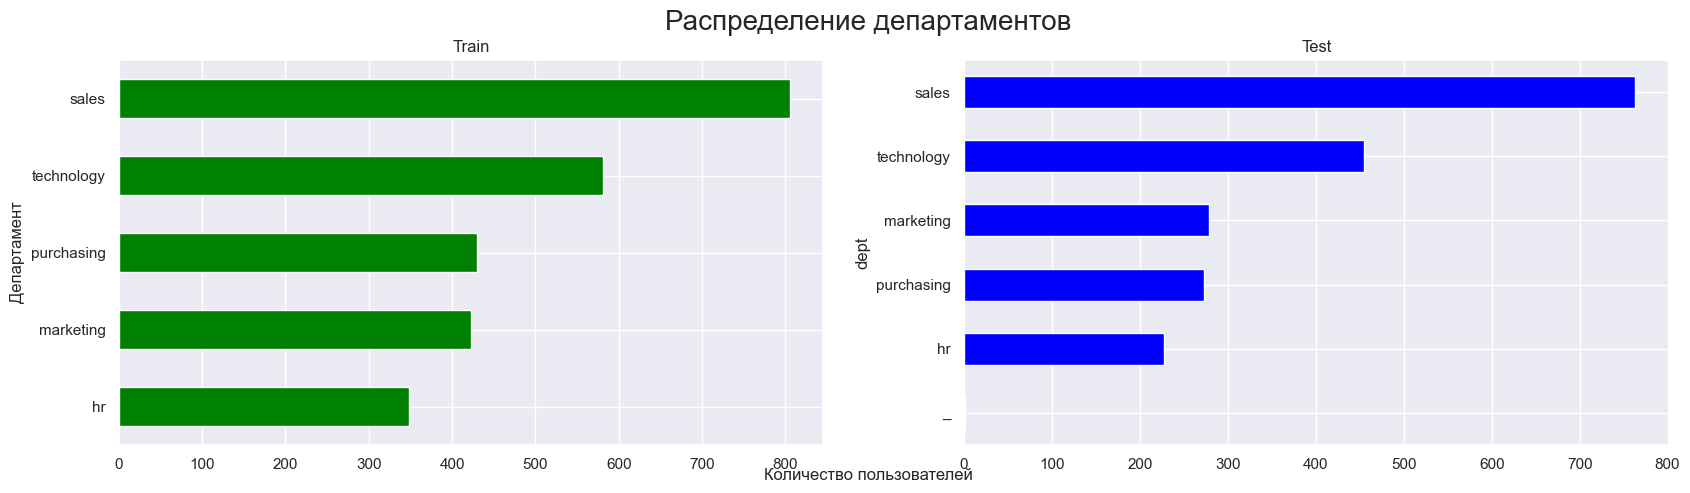

In [56]:
plot_train_test(
    train_q, X_test_q, 'dept', 'Распределение департаментов', 'Департамент'
)

#### Видно, что структура схожа. В тестовом датасете есть ошибочные записи. Отдел указан как `_`, заполним пустыми значениями `NaN`

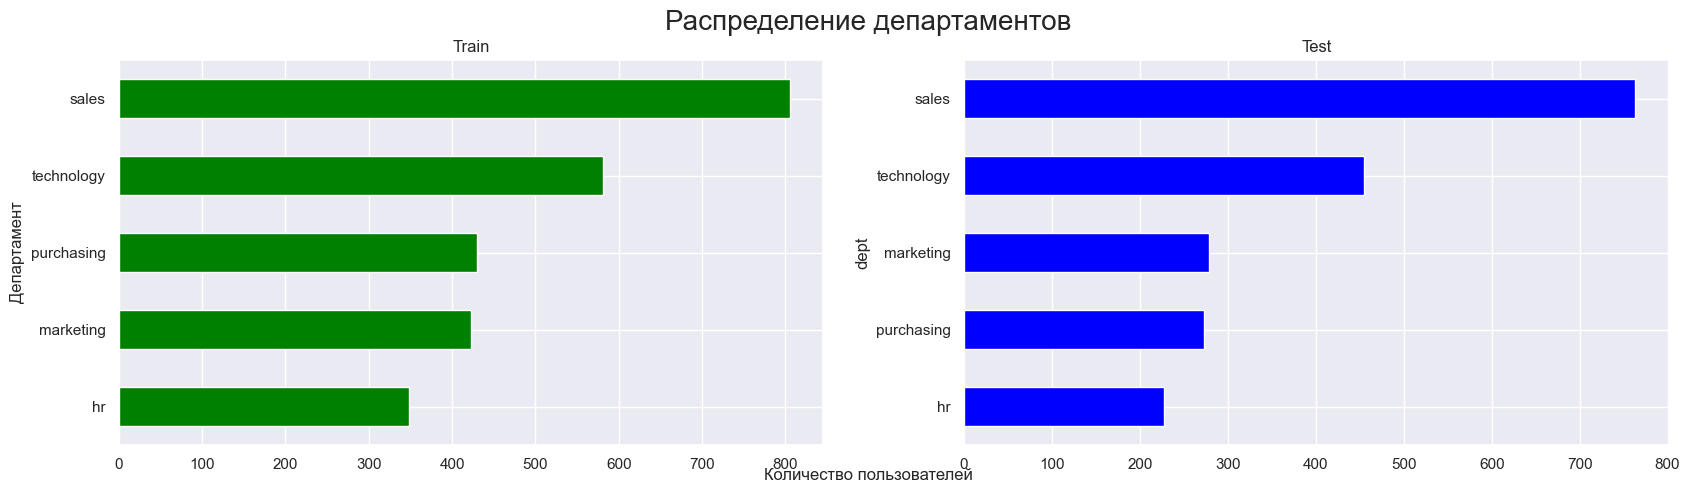

In [57]:
X_test_q['dept'] = X_test_q['dept'].replace('_', np.nan)
plot_train_test(
    train_q, X_test_q, 'dept', 'Распределение департаментов', 'Департамент'
)

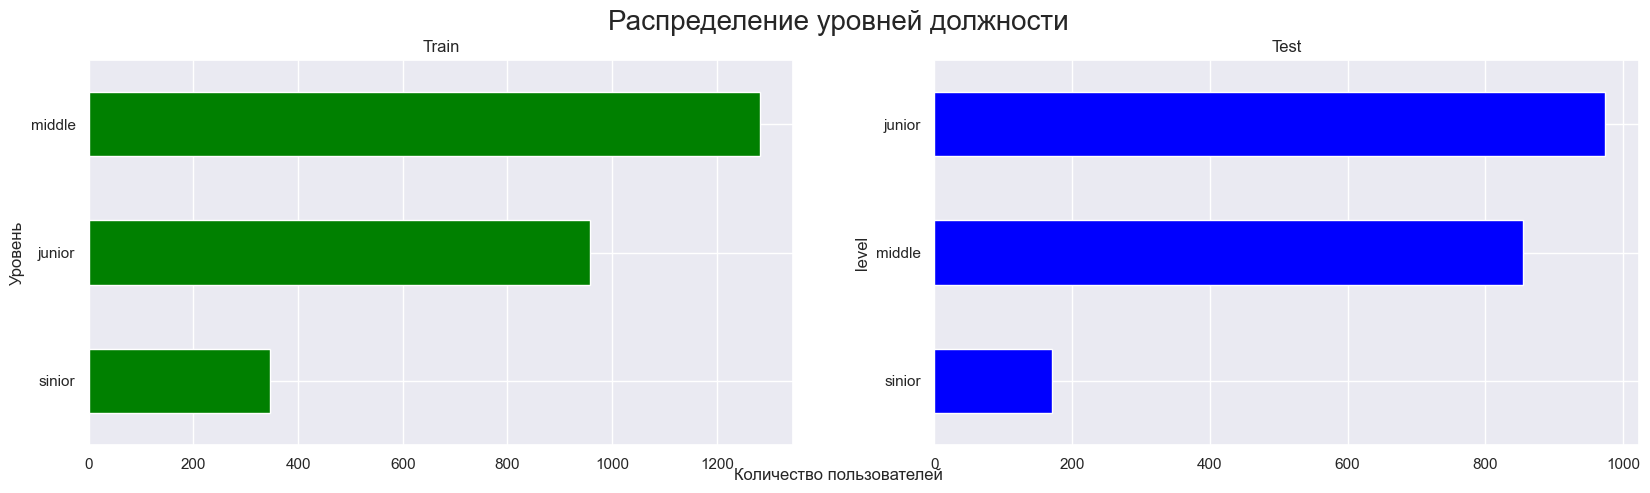

In [58]:
plot_train_test(
    train_q, X_test_q, 'level', 'Распределение уровней должности', 'Уровень'
)

В тренировочном датасете больше специалистов среднего уровня, а в тестовом - больше младших

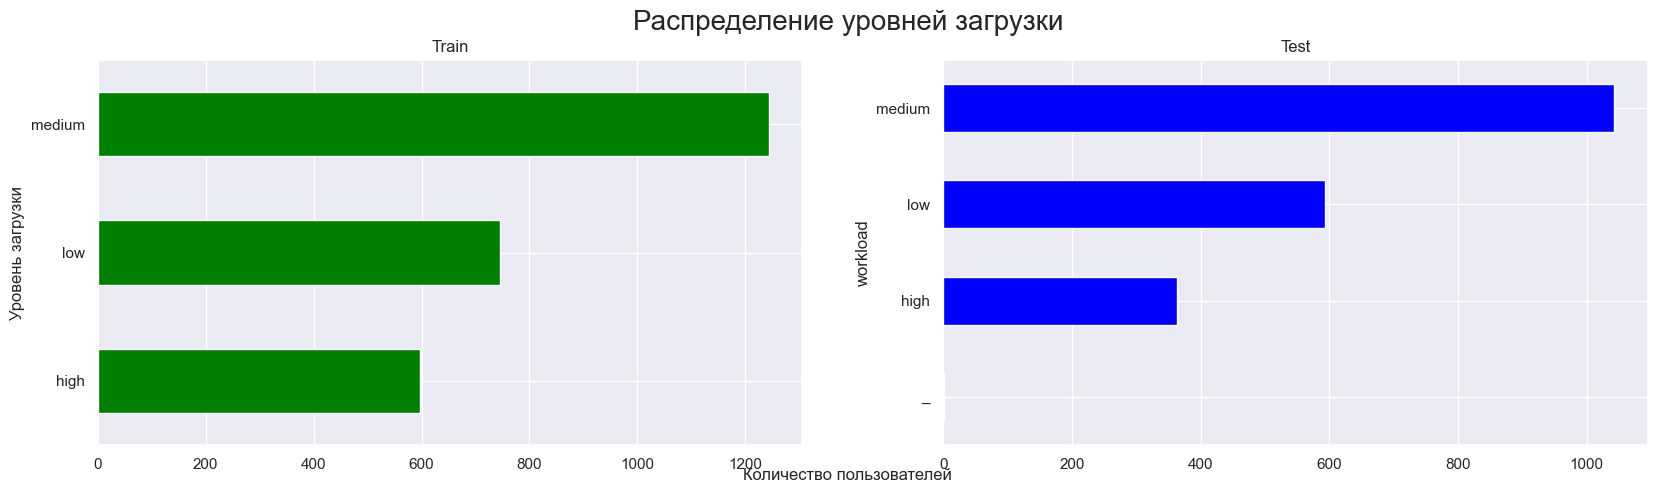

In [59]:
plot_train_test(
    train_q,
    X_test_q,
    'workload',
    'Распределение уровней загрузки',
    'Уровень загрузки',
)

#### Снова видно записи с ошибкой в тестовой выборке. Заменим на `NaN`

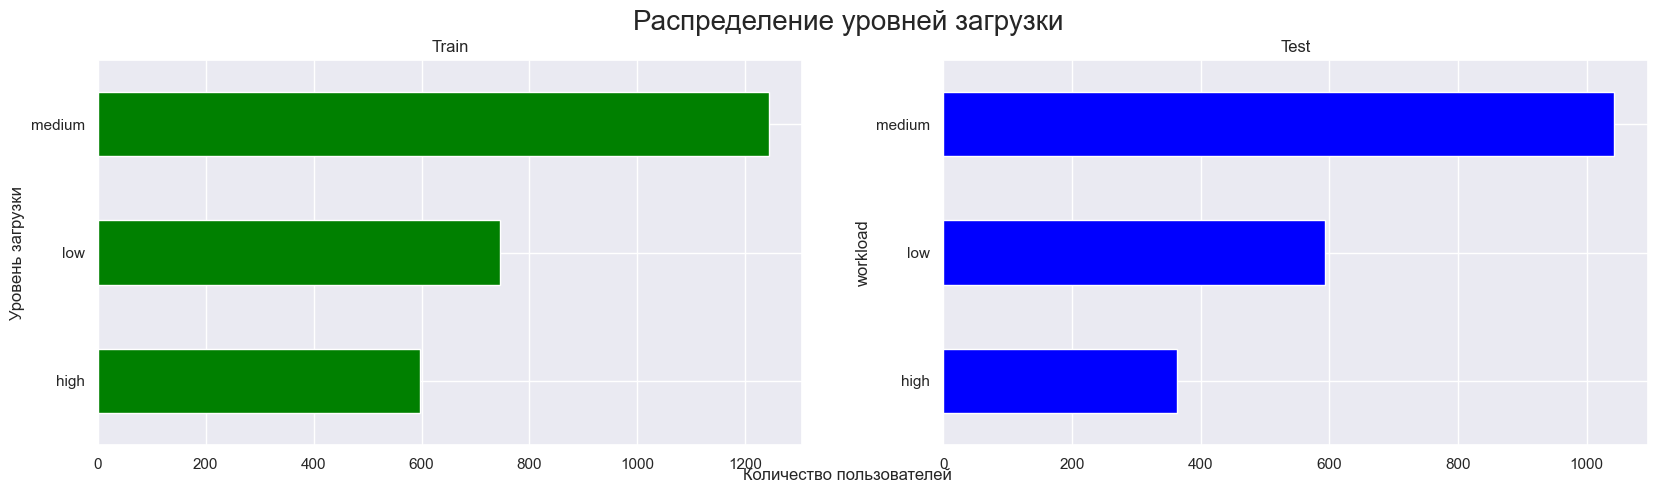

In [60]:
X_test_q['workload'] = X_test_q['workload'].replace('_', np.nan)
plot_train_test(
    train_q,
    X_test_q,
    'workload',
    'Распределение уровней загрузки',
    'Уровень загрузки',
)

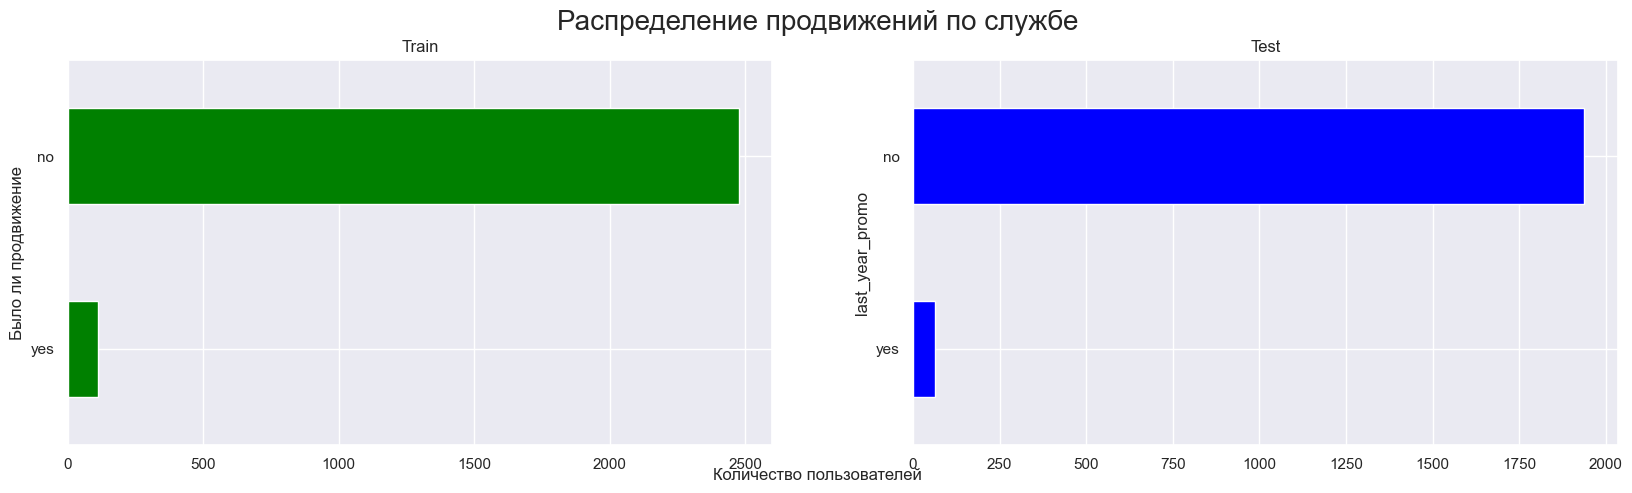

In [61]:
plot_train_test(
    train_q,
    X_test_q,
    'last_year_promo',
    'Распределение продвижений по службе',
    'Было ли продвижение',
)

### Также как и в предыдущем датасете, не так много людей получают продвижение

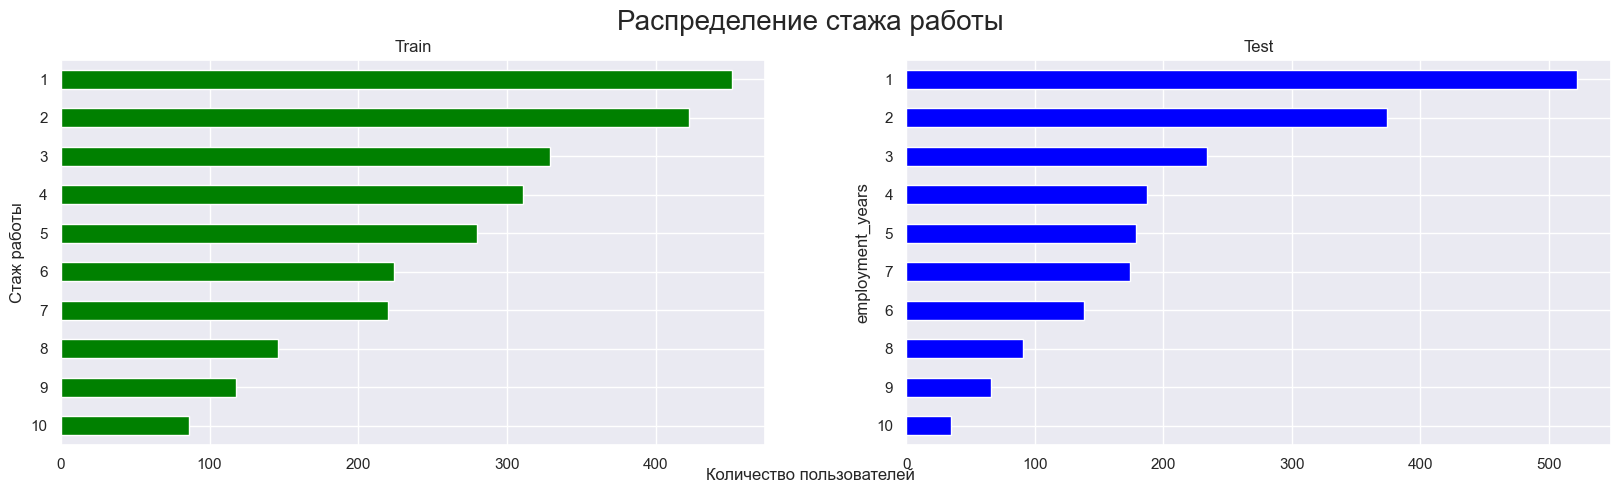

In [62]:
plot_train_test(
    train_q,
    X_test_q,
    'employment_years',
    'Распределение стажа работы',
    'Стаж работы',
)

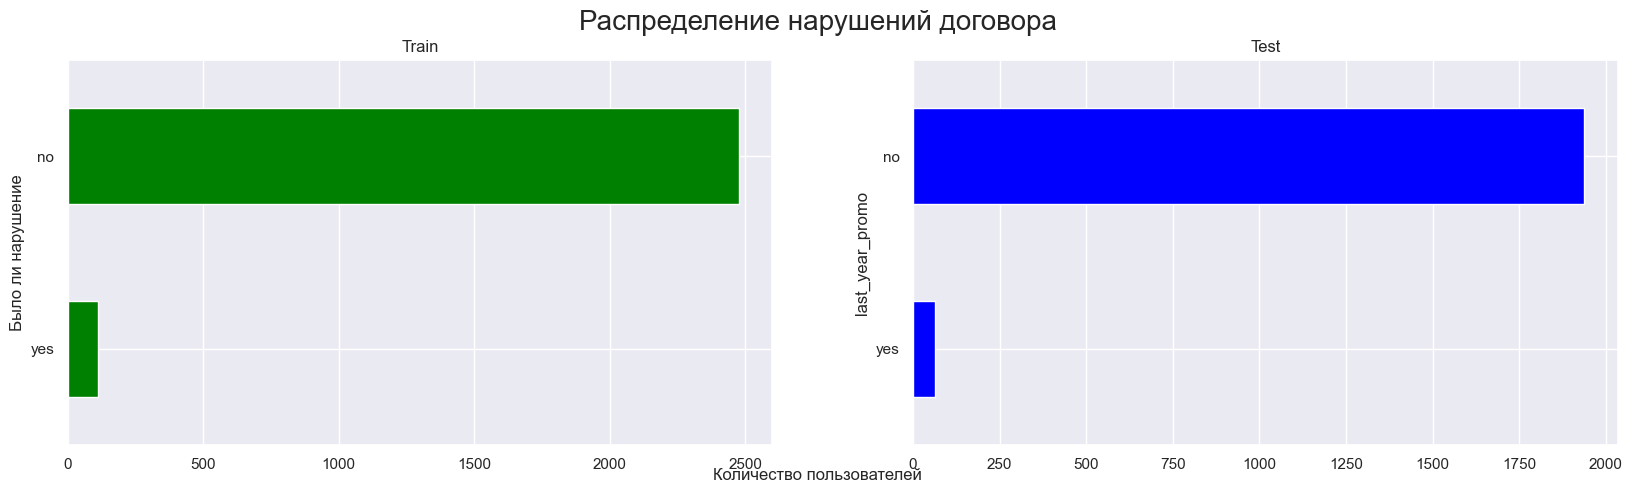

In [63]:
plot_train_test(
    train_q,
    X_test_q,
    'last_year_promo',
    'Распределение нарушений договора',
    'Было ли нарушение',
)

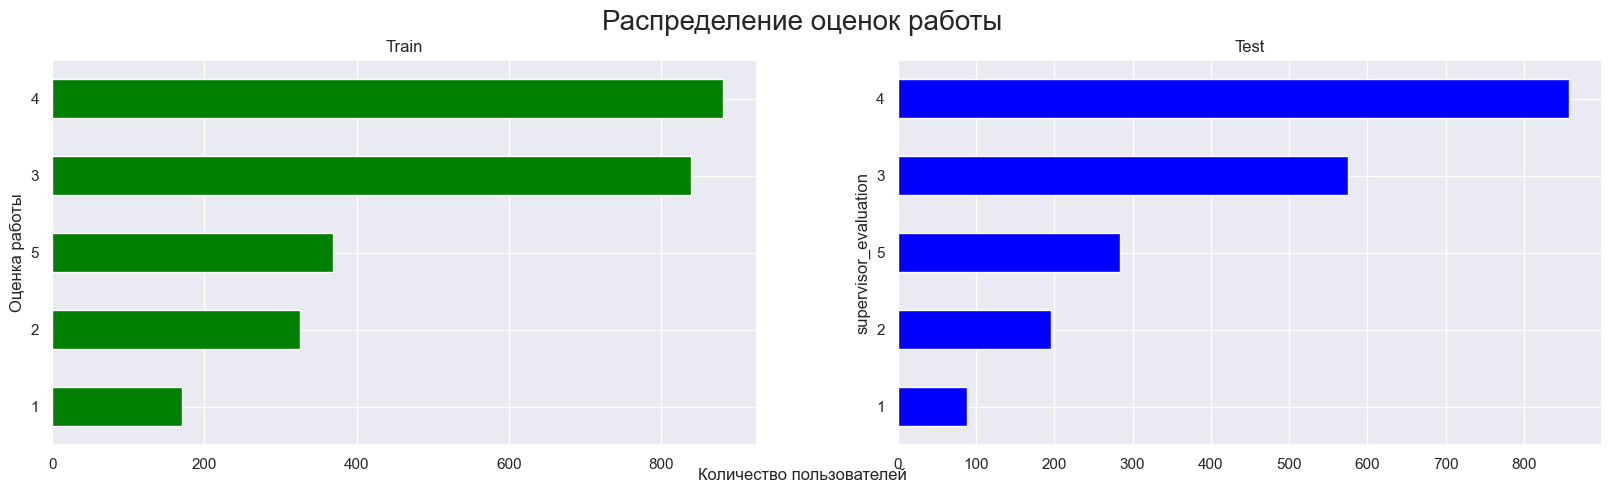

In [64]:
plot_train_test(
    train_q,
    X_test_q,
    'supervisor_evaluation',
    'Распределение оценок работы',
    'Оценка работы',
)

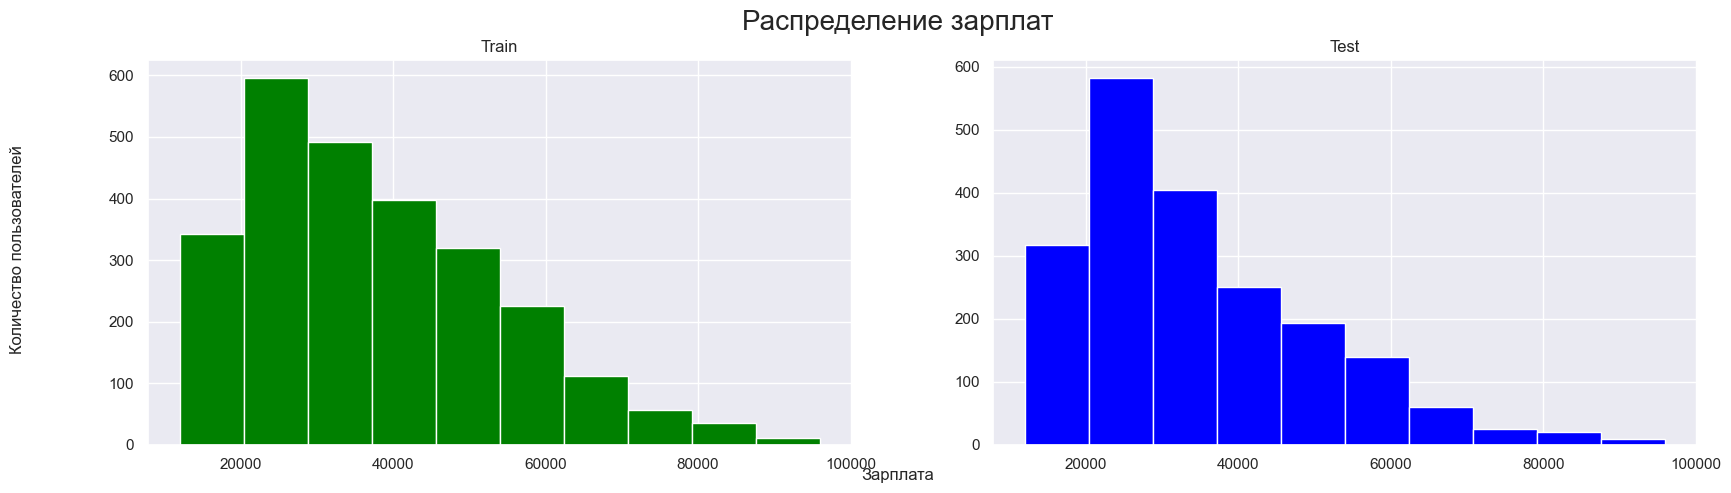

In [65]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
f.suptitle('Распределение зарплат', fontsize=20)

f.text(0.5, 0.04, 'Зарплата', ha='center')
f.text(
    0.06,
    0.5,
    'Количество пользователей',
    ha='center',
    va='center',
    rotation='vertical',
)

train_q['salary'].hist(figsize=(20, 5), color='green', ax=ax1)
ax1.set_title('Train')

X_test_q['salary'].hist(figsize=(20, 5), color='blue', ax=ax2)
ax2.set_title('Test')

plt.show()

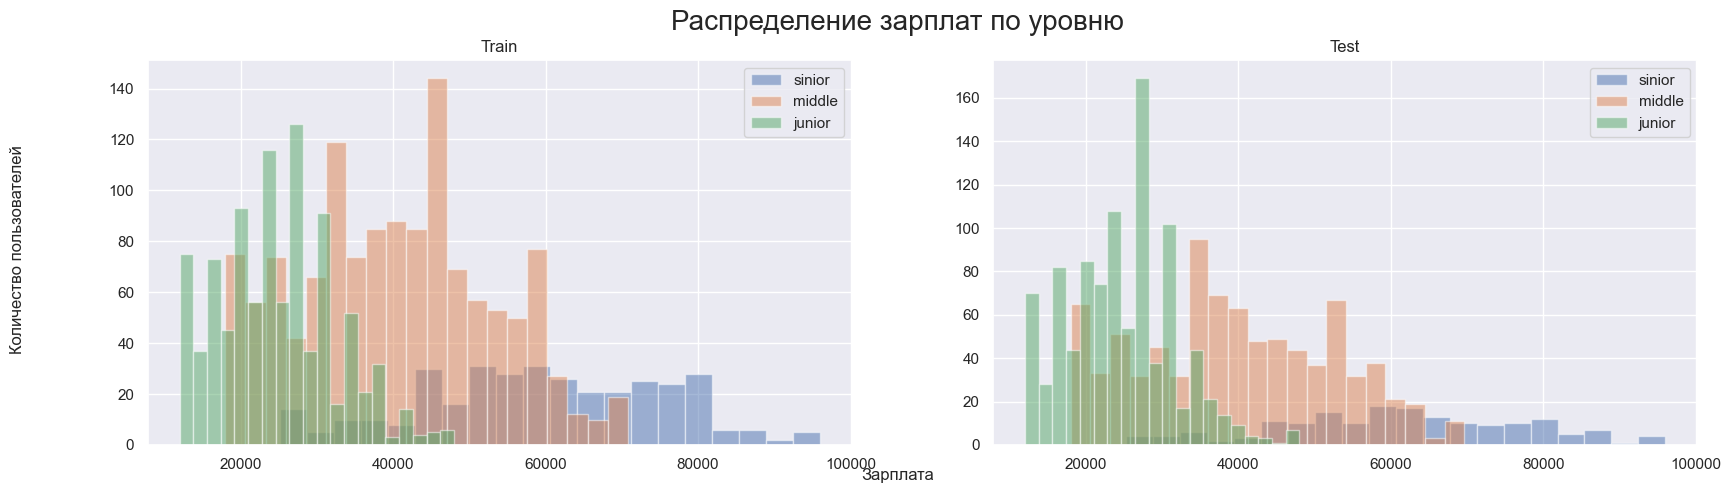

In [66]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
f.suptitle('Распределение зарплат по уровню', fontsize=20)

f.text(0.5, 0.04, 'Зарплата', ha='center')
f.text(
    0.06,
    0.5,
    'Количество пользователей',
    ha='center',
    va='center',
    rotation='vertical',
)

ax1.hist(
    train_q.query('level == "sinior"')['salary'],
    bins=20,
    alpha=0.5,
    label='sinior',
)
ax1.hist(
    train_q.query('level == "middle"')['salary'],
    bins=20,
    alpha=0.5,
    label='middle',
)
ax1.hist(
    train_q.query('level == "junior"')['salary'],
    bins=20,
    alpha=0.5,
    label='junior',
)
ax1.set_title('Train')
ax1.legend()

ax2.hist(
    X_test_q.query('level == "sinior"')['salary'],
    bins=20,
    alpha=0.5,
    label='sinior',
)
ax2.hist(
    X_test_q.query('level == "middle"')['salary'],
    bins=20,
    alpha=0.5,
    label='middle',
)
ax2.hist(
    X_test_q.query('level == "junior"')['salary'],
    bins=20,
    alpha=0.5,
    label='junior',
)
ax2.set_title('Test')
ax2.legend()

plt.show()

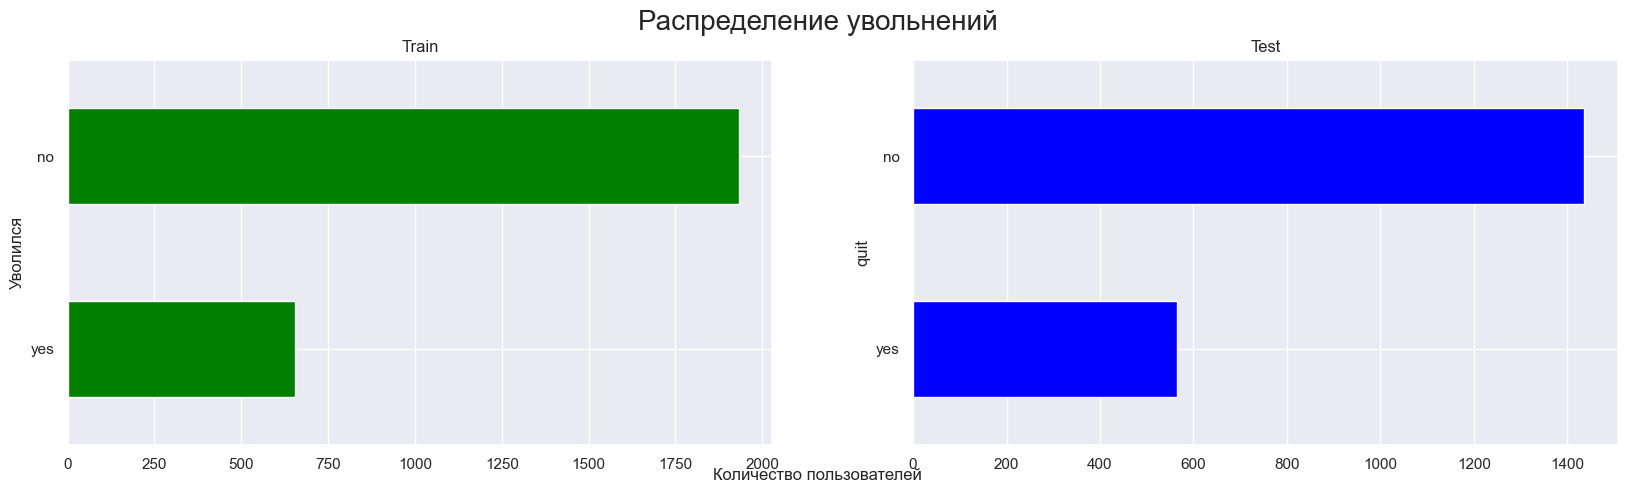

In [67]:
plot_train_test(
    train_q, y_test_q, 'quit', 'Распределение увольнений', 'Уволился'
)

#### В целом, выборки похожи друг на друга, немного отличаются только распределение грейдов

### Корреляционный анализ
Мультиколинеарность может затруднить работу регрессионных моделей. Проверим, нет ли её.

<Axes: >

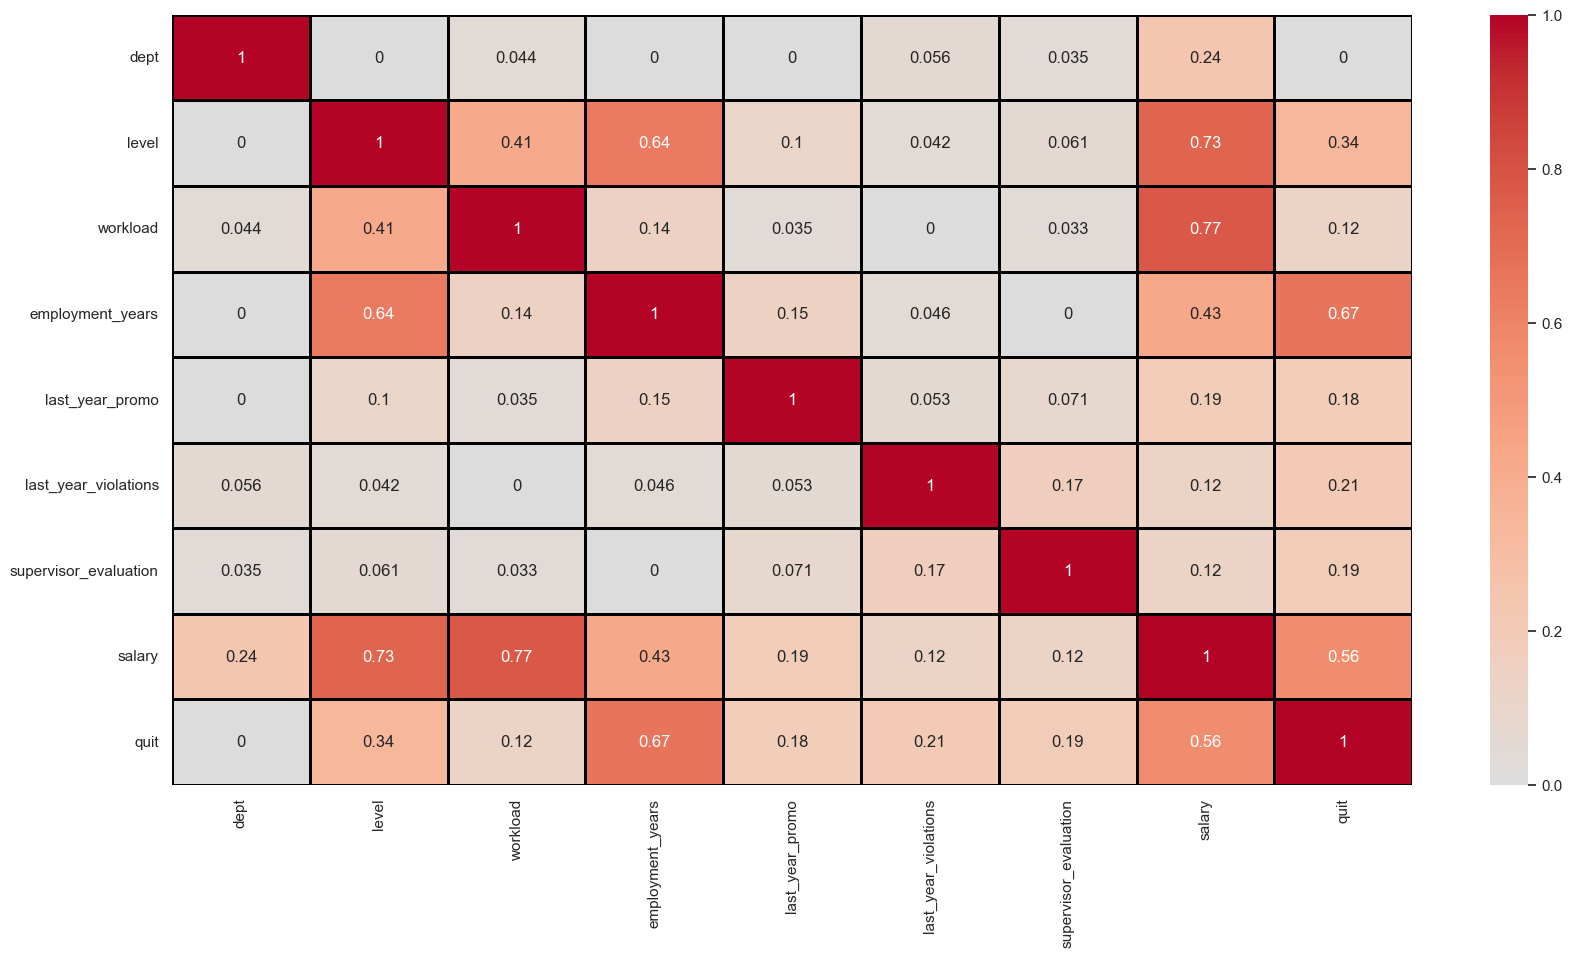

In [68]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    train_q.phik_matrix(interval_cols=['salary']),
    cmap='coolwarm',
    center=0,
    annot=True,
    linewidths=2,
    linecolor='black',
)

#### Наблюдается высокая корреляция уроня загрузки и зарплаты - `0.77`, она не превышает кретического значения. Также для задач классификации мультиколинеарность не так уж и важна. Оставим все переменные.

### Портрет уволившегося сотрудника
Посмотрим на распределение разных параметров у оставшихся и уволившихся сотрудников

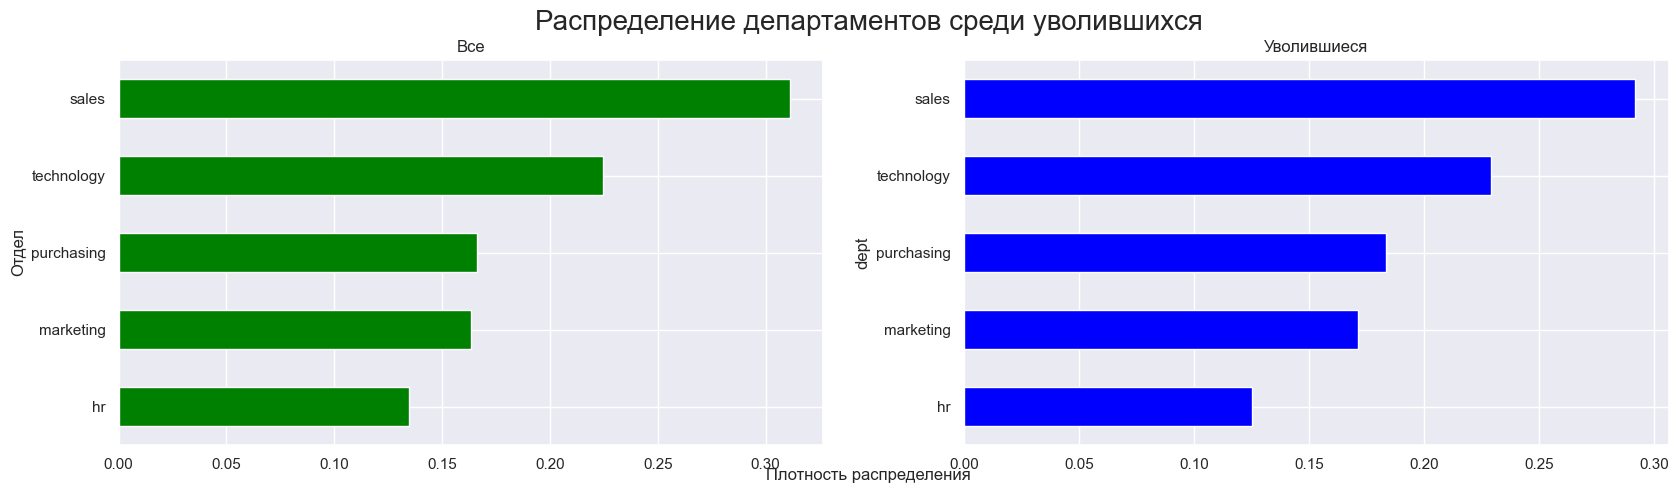

In [69]:
plot_train_test(
    train_q,
    train_q.query('quit == "yes"'),
    'dept',
    'Распределение департаментов среди уволившихся',
    'Отдел',
    True,
    'Все',
    'Уволившиеся',
    'Плотность распределения',
)

#### Количество уволившихся пользователей повторяет контур количества оставшихся.

In [70]:
pd.DataFrame(
    (
        train_q.query('quit == "yes"')['dept'].value_counts(normalize=True)
        - train_q['dept'].value_counts(normalize=True)
    )
).style.format(formatter={'proportion': "{0:.0%}"})

,proportion
dept,
sales,-2%
technology,0%
purchasing,2%
marketing,1%
hr,-1%


#### Немного чаще остальных компанию покидают специалисты отдела продаж. Чуть реже - отдела закупок.

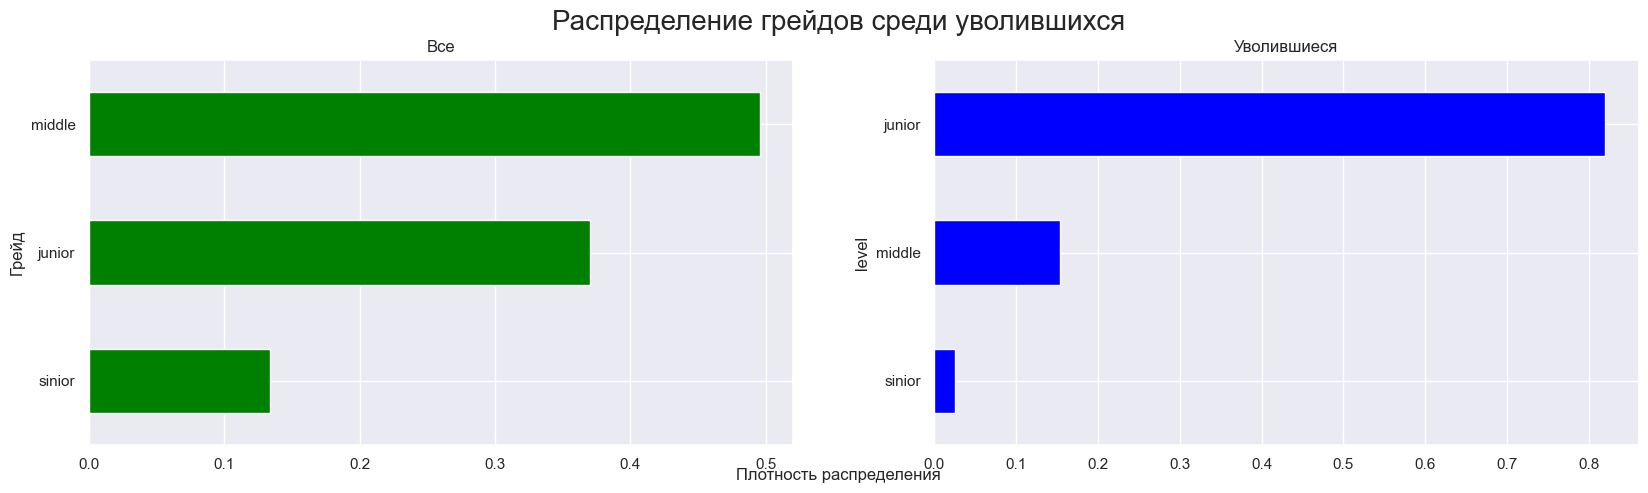

In [71]:
plot_train_test(
    train_q,
    train_q.query('quit == "yes"'),
    'level',
    'Распределение грейдов среди уволившихся',
    'Грейд',
    True,
    'Все',
    'Уволившиеся',
    'Плотность распределения',
)


In [72]:
pd.DataFrame(
    (
        train_q.query('quit == "yes"')['level'].value_counts(normalize=True)
        - train_q['level'].value_counts(normalize=True)
    )
).style.format(formatter={'proportion': "{0:.0%}"})

,proportion
level,
junior,45%
middle,-34%
sinior,-11%


### Чаще увольняются младшие специалисты

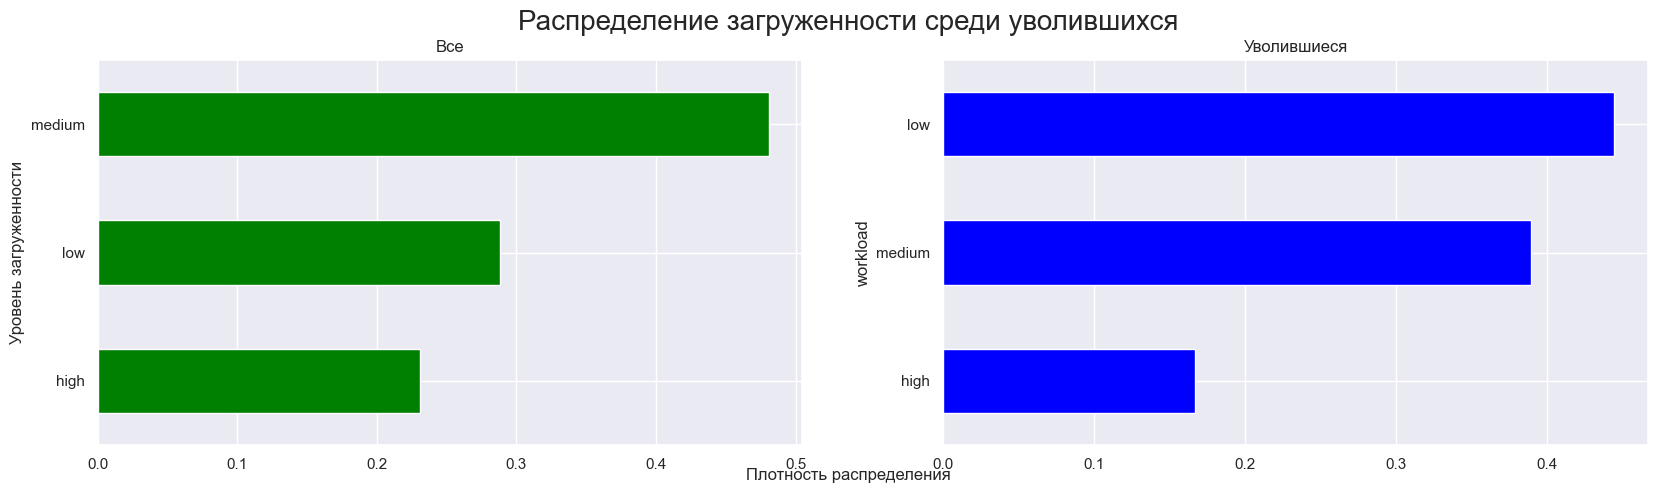

In [73]:
plot_train_test(
    train_q,
    train_q.query('quit == "yes"'),
    'workload',
    'Распределение загруженности среди уволившихся',
    'Уровень загруженности',
    True,
    'Все',
    'Уволившиеся',
    'Плотность распределения',
)

In [74]:
pd.DataFrame(
    (
        train_q.query('quit == "yes"')['workload'].value_counts(normalize=True)
        - train_q['workload'].value_counts(normalize=True)
    )
).style.format(formatter={'proportion': "{0:.0%}"})

,proportion
workload,
high,-6%
low,16%
medium,-9%


### Меньше всего увольняются сотрудники со средней загруженностью, а больше всего - с низкой. На своем опыте могу предположить, что незагруженные сотрудники ощущают свою ненужность, тем самым у них появляется время помониторить вакансии в других компаниях, и они не хотят тратить время в пустую.

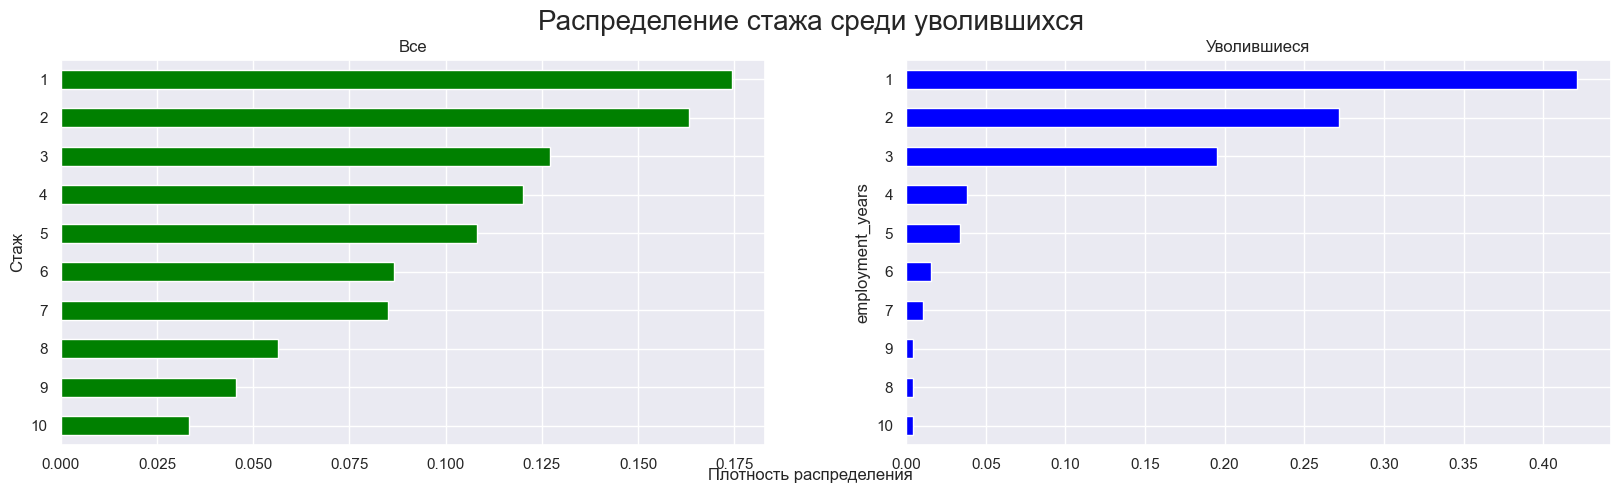

In [75]:
plot_train_test(
    train_q,
    train_q.query('quit == "yes"'),
    'employment_years',
    'Распределение стажа среди уволившихся',
    'Стаж',
    True,
    'Все',
    'Уволившиеся',
    'Плотность распределения',
)

In [76]:
pd.DataFrame(
    (
        train_q.query('quit == "yes"')['employment_years'].value_counts(
            normalize=True
        )
        - train_q['employment_years'].value_counts(normalize=True)
    )
).style.format(formatter={'proportion': "{0:.0%}"})

,proportion
employment_years,
1,25%
2,11%
3,7%
4,-8%
5,-7%
6,-7%
7,-7%
8,-5%
9,-4%


#### В основном увольняются в первый год работы, после 3х лет стажа количество уволившихся стремительно падает

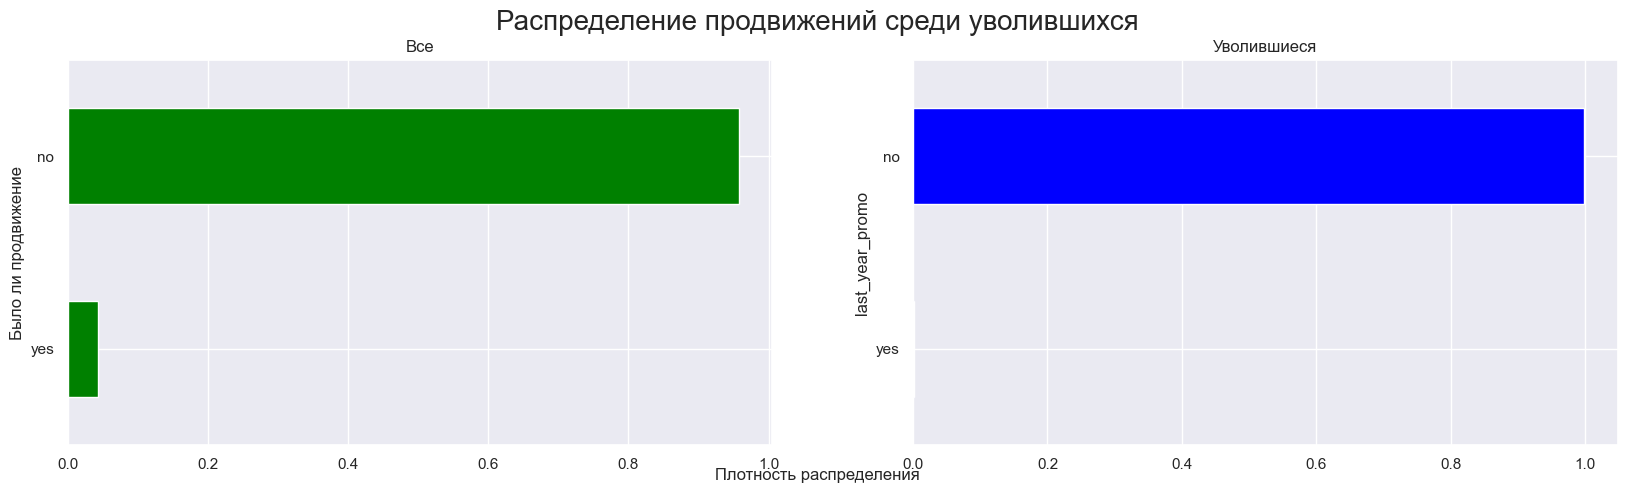

In [77]:
plot_train_test(
    train_q,
    train_q.query('quit == "yes"'),
    'last_year_promo',
    'Распределение продвижений среди уволившихся',
    'Было ли продвижение',
    True,
    'Все',
    'Уволившиеся',
    'Плотность распределения',
)

In [78]:
pd.DataFrame(
    (
        train_q.query('quit == "yes"')['last_year_promo'].value_counts(
            normalize=True
        )
        - train_q['last_year_promo'].value_counts(normalize=True)
    )
).style.format(formatter={'proportion': "{0:.0%}"})

,proportion
last_year_promo,
no,4%
yes,-4%


#### Среди уволившихся никто не получил продвижение, это является определенно сигналом

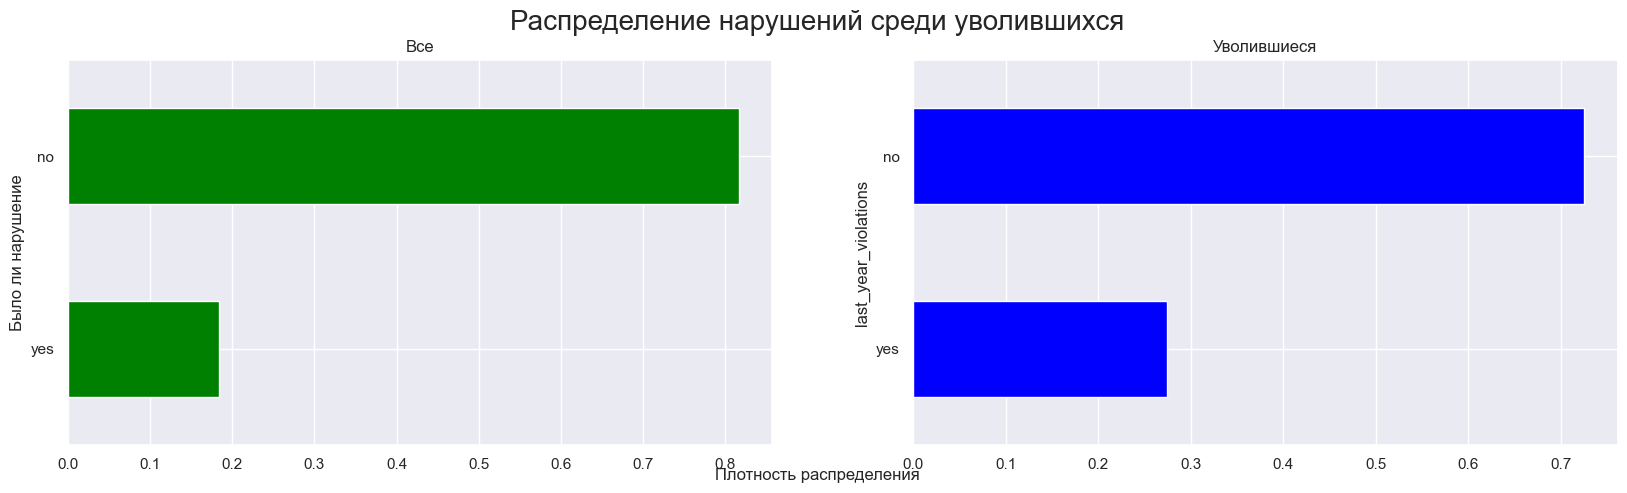

In [79]:
plot_train_test(
    train_q,
    train_q.query('quit == "yes"'),
    'last_year_violations',
    'Распределение нарушений среди уволившихся',
    'Было ли нарушение',
    True,
    'Все',
    'Уволившиеся',
    'Плотность распределения',
)

In [80]:
pd.DataFrame(
    (
        train_q.query('quit == "yes"')['last_year_violations'].value_counts(
            normalize=True
        )
        - train_q['last_year_violations'].value_counts(normalize=True)
    )
).style.format(formatter={'proportion': "{0:.0%}"})

,proportion
last_year_violations,
no,-9%
yes,9%


#### Уволившиеся сотрудники чаще нарушают договор

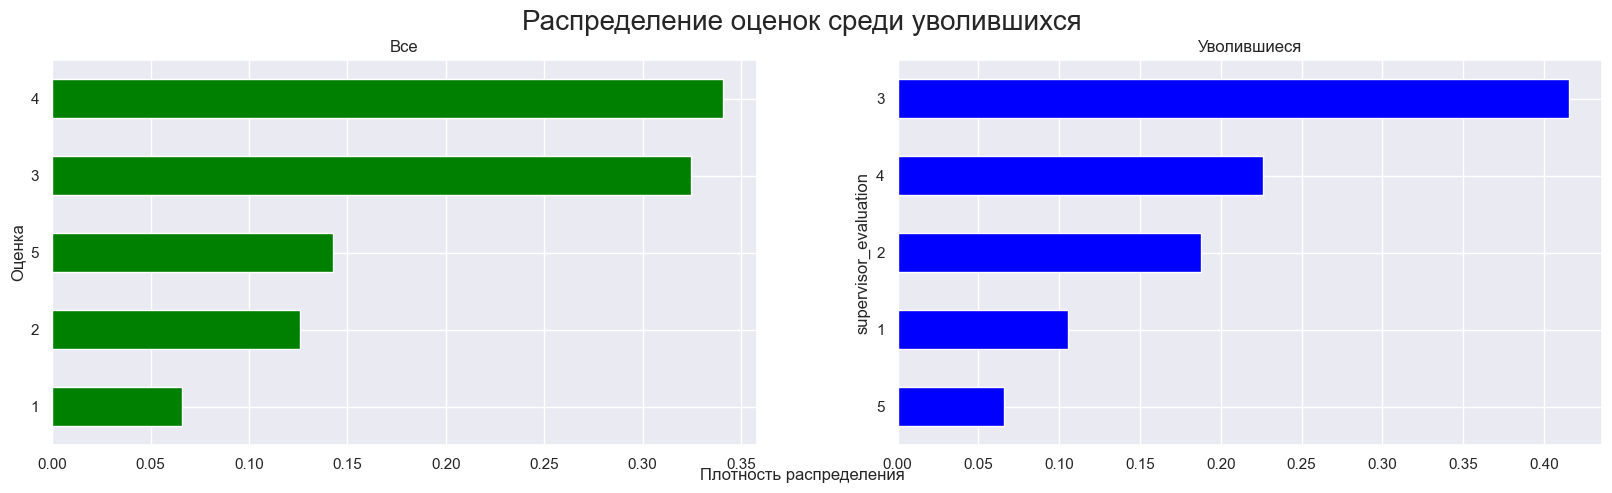

In [81]:
plot_train_test(
    train_q,
    train_q.query('quit == "yes"'),
    'supervisor_evaluation',
    'Распределение оценок среди уволившихся',
    'Оценка',
    True,
    'Все',
    'Уволившиеся',
    'Плотность распределения',
)

In [82]:
pd.DataFrame(
    (
        train_q.query('quit == "yes"')['supervisor_evaluation'].value_counts(
            normalize=True
        )
        - train_q['supervisor_evaluation'].value_counts(normalize=True)
    )
).style.format(formatter={'proportion': "{0:.0%}"})

,proportion
supervisor_evaluation,
1,4%
2,6%
3,9%
4,-11%
5,-8%


#### Нельзя точно сказать, что уволившиеся сотрудники работают плохо, но заметно, среди оставшихся меньше получают минимальную оценку, а среди уволившихся - меньше получают максимальную.

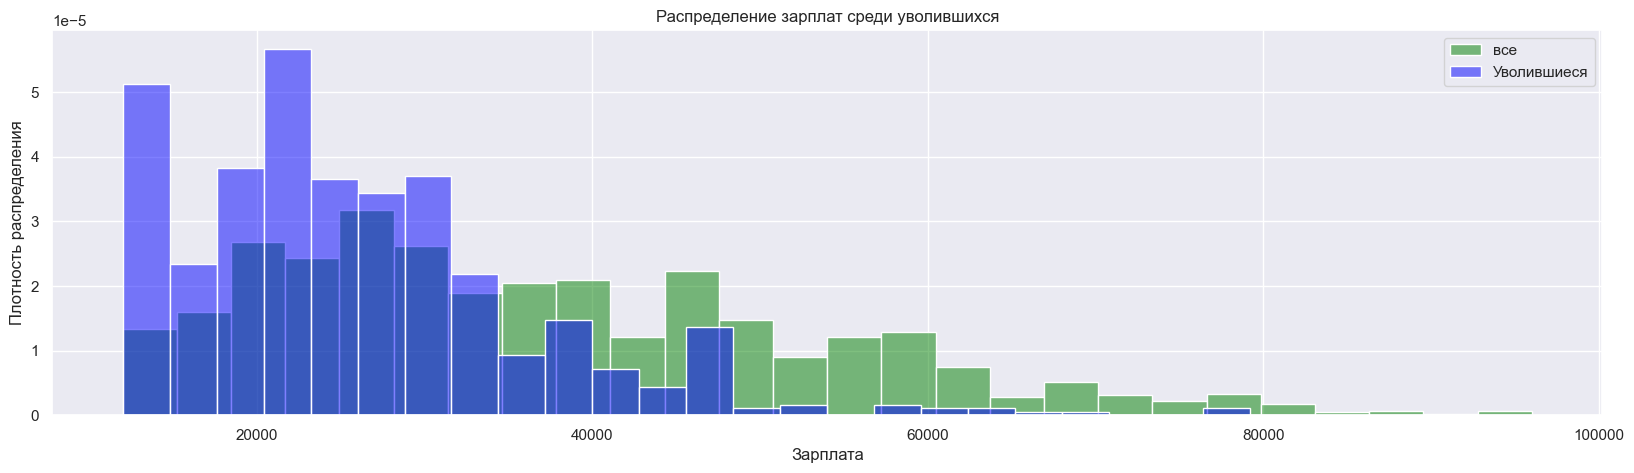

In [83]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.title('Распределение зарплат среди уволившихся')
sns.histplot(
    train_q['salary'],
    stat='density',
    common_norm=False,
    alpha=0.5,
    label='все',
    color='green',
    ax=ax,
)
sns.histplot(
    train_q.query('quit == "yes"')['salary'],
    stat='density',
    common_norm=False,
    alpha=0.5,
    label='Уволившиеся',
    color='blue',
    ax=ax,
)
ax.set(xlabel='Зарплата', ylabel='Плотность распределения')
ax.legend()
plt.show()

In [84]:
decrease_percentage = round(
    (1 - (
        train_q.query('quit == "yes"')['salary'].mean()
        / train_q.query('quit == "no"')['salary'].mean()
    )) * 100, 2
)

print(f'Зарплата уволившихся сотрудников в среднем на {decrease_percentage}% меньше.')

Зарплата уволившихся сотрудников в среднем на 37.08% меньше.


#### Чаще увольняются сотрудники с низкими зарплатами. Зарплата уволившихся сотрудников в среднем на 37% меньше. Можем предположить, что они ищут более доходные места работы.

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение: визуализируем и сравним распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Для этого на тренировочной выборке предскажем показатель, воспользовавшись нашей лучшей моделью, а на тестовой выборке - воспользуемся результатами из предыдущей задачи.

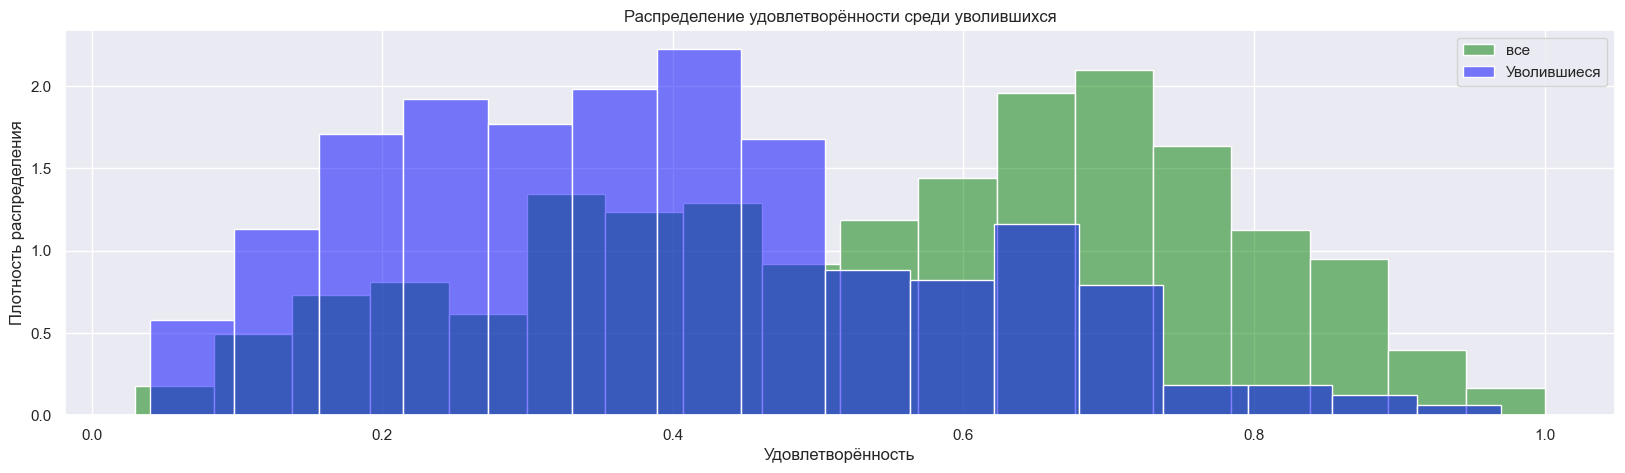

In [85]:
portrait = X_test_q.merge(y_test_q, left_index=True, right_index=True).merge(
    y_test, left_index=True, right_index=True
)

fig, ax = plt.subplots(figsize=(20, 5))
plt.title('Распределение удовлетворённости среди уволившихся')
sns.histplot(
    portrait['job_satisfaction_rate'],
    stat='density',
    common_norm=False,
    alpha=0.5,
    label='все',
    color='green',
    ax=ax,
)
sns.histplot(
    portrait.query('quit == "yes"')['job_satisfaction_rate'],
    stat='density',
    common_norm=False,
    alpha=0.5,
    label='Уволившиеся',
    color='blue',
    ax=ax,
)
ax.set(xlabel='Удовлетворённость', ylabel='Плотность распределения')
ax.legend()
plt.show()

In [86]:
round(
    portrait.query('quit == "yes"')['job_satisfaction_rate'].mean()
    / portrait.query('quit == "no"')['job_satisfaction_rate'].mean(),
    2,
)

np.float64(0.63)

### Действительно, в среднем уровень удовлетворенности уволившихся на 37% ниже оставшихся.

# Промежуточный вывод

1. **Отделы, чаще всего покидаемые сотрудниками:**
   - **Продажи:** Специалисты из отдела продаж покидают компанию немного чаще, чем сотрудники других отделов.
   - **Маркетинг:** Сотрудники отдела маркетинга увольняются чуть реже, чем специалисты из других подразделений.

2. **Категории сотрудников по стажу и уровню:**
   - **Младшие специалисты:** Увольняются значительно чаще, что связано с их более низким уровнем заработной платы.

3. **Загруженность работы:**
   - **Средняя загруженность:** Сотрудники с таким уровнем загруженности увольняются реже всего.
   - **Низкая загруженность:** Наибольшее количество увольнений наблюдается среди сотрудников с низкой нагрузкой.

4. **Стаж работы:**
   - **Первый год:** Основная масса увольнений приходится на первый год работы.
   - **После трёх лет:** Количество увольнений стремительно падает после достижении трёхлетнего стажа.

5. **Повышения и карьерный рост:**
   - Среди уволившихся почти никто не получил продвижения, что является определённым сигналом для руководства компании.

6. **Уровень заработной платы:**
   - **Низкие зарплаты:** Чаще увольняются сотрудники с низкими зарплатами.
   - Зарплата уволившихся сотрудников в среднем на **37%** ниже, чем у оставшихся.

7. **Уровень удовлетворённости:**
   - В среднем, уровень удовлетворённости уволившихся сотрудников на **37%** ниже, чем у тех, кто остаётся в компании.

## Моделирование

### Подготовка данных

In [87]:
# Подготовим тренировочный датасет
X_train_q = train_q.drop(['quit'], axis=1)
y_train_q = train_q['quit']

# Тестовый датасет соединим и разделим, чтобы убедиться, что записи соответствуют друг другу
test_q_df = X_test_q.merge(y_test_q, left_index=True, right_index=True)
X_test_q = test_q_df.drop(['quit'], axis=1)
y_test_q = test_q_df['quit']

#### Сделаем предсказания удовлетворенности тестаСделаем предсказания удовлетворенности теста

In [88]:
X_train_q['job_satisfaction_rate'] = best_regressor.predict(X_train_q)
X_test_q['job_satisfaction_rate'] = best_regressor.predict(X_test_q)

##### Обработчик для разных типов колонок можно оставить из предыдущей модели. Только в численные колонки нужно добавить `job_satisfaction_rate`. Также нужно закодировать переменную `quit`.

In [89]:
num_cols.append('job_satisfaction_rate')

In [90]:
lab_encoder = LabelEncoder()

lab_encoder.fit(['no', 'yes'])

y_train_q = lab_encoder.transform(y_train_q)
y_test_q = lab_encoder.transform(y_test_q)

#### В стандартной модели заменим регрессор на классификатор

In [91]:
pipe_final = Pipeline(
    # Финальный пайплайн
    [
        ('preprocessor', data_preprocessor),
        ('model', DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ]
)

### Поиск модели и обработки
Проверим разные модели с разными гиперпараметрами. Также попробуем разные обработчики числовых переменных.

In [92]:
# Параметры для LogisticRegression
logreg_params = {}

logreg_params['preprocessor__num'] = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
]


logreg_params['model__penalty'] = ['l2', 'l1']
logreg_params['model'] = [
    LogisticRegression(
        random_state=RANDOM_STATE, solver='liblinear', max_iter=1000
    )
]


# Параметры для KNeighborsClassifier
knn_params = {}

knn_params['preprocessor__num'] = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
]

knn_params['model'] = [KNeighborsClassifier()]

# Параметры для DecisionTreeClassifier
tree_params = {}

tree_params['preprocessor__num'] = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
]

tree_params['model__max_depth'] = [None]
tree_params['model__min_samples_leaf'] = range(10, 15)
tree_params['model__min_samples_split'] = range(50, 65)
tree_params['model__max_leaf_nodes'] = range(440, 450)
tree_params['model'] = [DecisionTreeClassifier(random_state=RANDOM_STATE)]

# Параметры для SVC
svc_params = {}

svc_params['preprocessor__num'] = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
]

svc_params['model'] = [SVC(probability=True, random_state=RANDOM_STATE)]

params = [logreg_params, knn_params, tree_params, svc_params]

In [93]:
grid_class = GridSearchCV(
    pipe_final, params, cv=5, n_jobs=-1, scoring='roc_auc'
)

In [94]:
grid_class.fit(X_train_q, y_train_q)

D:\Projects\ecofarm\.venv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(...
                          'model__max_depth': [None],
                          'model__max_leaf_nodes': range(440, 450),
                          'model__min_samples_leaf': range(10, 15),
                          'model__min_samples_split': range(50, 65),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                RobustScaler()]},
                         {'model': [SVC(probability=True, random_state=42)],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                RobustScaler()]}],
             scoring='roc_auc')

In [95]:
best_classifier = grid_class.best_estimator_
best_classifier

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  ['salary',
                                                   'supervisor_evaluation',
                                                   'employment_years',
                                                   'job_satisfaction_rate'])])),
                ('model',
                 DecisionTreeClassifier(max_leaf_nodes=440, min_samples_leaf=11,
                                        min_samples_split=63,
                                        random_state=42))])

In [96]:
# roc_auc на кросс-валидации
grid_class.best_score_

np.float64(0.9025852772966607)

### Предсказание увольнения

In [97]:
y_pred_q = best_classifier.predict_proba(X_test_q)

In [98]:
roc_auc_score(y_test_q, y_pred_q[:, 1])

np.float64(0.9216444171161027)

### Снова лучше всего показало себя дерево решений.
  - Минимальное количество узлов **440**
  - Минимальное количество семплов в листе **11**
  - Минимальное количество семплов для разделения **63**

In [99]:
# Сравним с DummyClassifier
dummy_class = DummyClassifier(strategy='uniform')
dummy_class.fit(X_train_q, y_train_q)
dummy_class_pred = dummy_class.predict_proba(X_test_q)
roc_auc_score(y_test_q, dummy_class_pred[:, 1])

np.float64(0.5)

#### roc_auc модели значительно превосходит DummyClassifier

### Сравнение разных моделей

In [100]:
results_df_class = pd.DataFrame(grid_class.cv_results_)
results_df_class = results_df_class.sort_values(by=["rank_test_score"])
results_df_class = results_df_class.set_index(
    results_df_class["params"].apply(
        lambda x: "_".join(str(val) for val in x.values())
    )
).rename_axis("kernel")
results_df_class[
    ["params", "rank_test_score", "mean_test_score", "std_test_score"]
].head()

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
DecisionTreeClassifier(random_state=42)_None_442_11_63_RobustScaler(),{'model': DecisionTreeClassifier(random_state=...,1,0.902585,0.014836
DecisionTreeClassifier(random_state=42)_None_442_11_64_StandardScaler(),{'model': DecisionTreeClassifier(random_state=...,1,0.902585,0.014836
DecisionTreeClassifier(random_state=42)_None_442_11_64_MinMaxScaler(),{'model': DecisionTreeClassifier(random_state=...,1,0.902585,0.014836
DecisionTreeClassifier(random_state=42)_None_442_11_64_RobustScaler(),{'model': DecisionTreeClassifier(random_state=...,1,0.902585,0.014836
DecisionTreeClassifier(random_state=42)_None_442_11_63_MinMaxScaler(),{'model': DecisionTreeClassifier(random_state=...,1,0.902585,0.014836


## Общий вывод:

### Выполненные задачи:

1. **Предсказать уровень удовлетворённости сотрудника работой.**
2. **Предсказать возможность его увольнения.**

### Наши шаги:

1. **Загрузка и обработка данных:**
   - Проверили наличие дублей и пропущенных значений.
   - Обнаружили и исправили ошибки при заполнении таблиц.

2. **Исследовательский анализ данных:**
   - Проанализировали сбалансированность классов.
   - Изучили распределение переменных в различных аспектах.

3. **Корреляционный анализ:**
   - Мультиколлинеарности не обнаружили.

4. **Метрика для оценки модели:**
   - Создали собственную метрику — **SMAPE**.

5. **Обучение регрессионной модели:**
   - Предсказание удовлетворённости сотрудника.
   - Достигли отличного результата — **SMAPE = 13%**.

6. **Обогащение данных:**
   - Использовали результаты для обогащения датасета для второй задачи.

7. **Выводы:**
   - Удовлетворенность сотрудника — один из важнейших признаков риска увольнения.

### Рекомендации для бизнеса:

- **Контроль уровня загрузки сотрудников:**
  - Недостаток задач увеличивает вероятность увольнения из-за отсутствия аргументов для повышения должности или зарплаты.
  - Сотрудникам может быть скучно, что способствует их уходу на собеседования.

- **Разработка прозрачной схемы повышений:**
  - Каждому сотруднику должна быть понятна процедура увеличения грейда.

- **Горизонтальное перемещение между отделами:**
  - Это позволит сотрудникам перейти в сферу, более подходящую их навыками и интересами.

- **Удержание сотрудников:**
  - Чем дольше сотрудник работает, тем меньше риск его увольнения — важно удерживать их.

- **Регулярные оценки работы:**
  - Обратная связь с сотрудниками поможет им понять, на что делать упор для повышения качества работы.
